<a href="https://colab.research.google.com/github/ar851060/ESUN_AI_2021_winter/blob/main/3_NaN_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 讀入資料

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 引入套件

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random
import statistics
# from numpy.ma.extras import median
from statistics import mode

# NA值

## 看全部資料的有NA的observation

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  dat = df.drop(df.columns[0],axis = 1)
  del df
  comb.append(dat.isna().sum())
  del dat
dat = pd.concat(comb,axis = 1)

In [ ]:
dat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shop_tag,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
txn_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
txn_amt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
domestic_offline_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
domestic_online_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
overseas_offline_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
overseas_online_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
domestic_offline_amt_pct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


在'masts'之後的變數才有NA值的出現，即在關於個人資料的部分才有缺失；大部分的NA則是出現在變數'slam'、'gender_code'和'age'。

## slam 信用額度

小編:NA可能是因為該顧客有多張對應主卡，因此無法找出對應的上限，並非無上限

In [ ]:
# 用date_24做觀察
data_24 = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_24.csv")

In [ ]:
data_24.head(10)

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
0,31391240,24,10048145,45,1,2262.383305,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.0,5.0,15.0,1.0,99.0,30.0,1.622014e+07,0.0,2.0,0
1,31391251,24,10280942,15,1,9483.740630,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,1.0,1.0,30.0,7.415214e+04,1.0,5.0,1
2,31391260,24,10280942,37,7,14626.255686,7,0,0,0,1.0,0.0,0.0,0.0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,1.0,1.0,30.0,7.415214e+04,1.0,5.0,1
3,31391266,24,10212505,18,1,4946.286371,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,2.0,5.0,15.0,1.0,99.0,30.0,9.993598e+04,1.0,6.0,1
4,31391276,24,10212505,19,1,8306.971364,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,2.0,5.0,15.0,1.0,99.0,30.0,9.993598e+04,1.0,6.0,1
5,31391285,24,10212505,37,11,21596.712278,11,0,0,0,1.0,0.0,0.0,0.0,0,0,0,2,0,0,0,0,0,9,0,0,0,0,0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.93,0.0,0.0,0.0,0.0,0.0,2.0,5.0,15.0,1.0,99.0,30.0,9.993598e+04,1.0,6.0,1
6,31391293,24,10212505,45,3,4713.615203,3,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,2.0,5.0,15.0,1.0,99.0,30.0,9.993598e+04,1.0,6.0,1
7,31391300,24,10212892,10,6,33964.238902,0,6,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,5.0,12.0,1.0,3.0,30.0,1.179203e+05,0.0,5.0,1
8,31391304,24,10267183,10,1,4932.554730,0,0,0,1,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
9,31391305,24,10256467,12,1,2397.282233,0,1,0,0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,1.0,1.0,30.0,9.598282e+04,0.0,5.0,1


'slam'是正卡信用額度，因此推測副卡('primary_card'顯示為0者)並沒有此項數據。

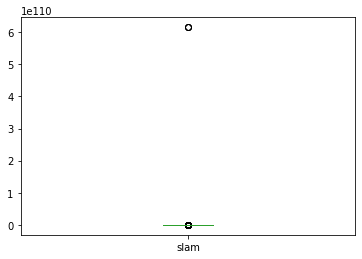

In [ ]:
data_24['slam'].plot.box()

In [ ]:
data_24[data_24['slam'] == data_24['slam'].max()]

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
779595,32170953,24,10466537,11,1,13695.478547,0,1,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
779605,32170963,24,10466537,other,6,22650.861350,0,5,0,1,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
779607,32170965,24,10466537,39,8,99326.455751,8,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0


In [ ]:
data_24[data_24['slam']>10**12]

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
51474,31442832,24,10301114,2,9,27873.988241,9,0,0,0,1.00,0.00,0.0,0.0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,99.0,30.0,2.729653e+33,1.0,6.0,0
51484,31442842,24,10301114,15,2,3408.942033,2,0,0,0,1.00,0.00,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,99.0,30.0,2.729653e+33,1.0,6.0,0
51493,31442851,24,10301114,26,1,9454.620660,1,0,0,0,1.00,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,99.0,30.0,2.729653e+33,1.0,6.0,0
51502,31442860,24,10301114,other,1,2262.383305,1,0,0,0,1.00,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,99.0,30.0,2.729653e+33,1.0,6.0,0
51510,31442868,24,10301114,37,3,7181.152536,1,2,0,0,0.63,0.37,0.0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,99.0,30.0,2.729653e+33,1.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494653,32886011,24,10175733,15,3,13418.731765,3,0,0,0,1.00,0.00,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,2.0,99.0,30.0,1.212432e+17,0.0,3.0,0
1494662,32886020,24,10175733,36,4,5419.225995,0,4,0,0,0.00,1.00,0.0,0.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,2.0,99.0,30.0,1.212432e+17,0.0,3.0,0
1494672,32886030,24,10175733,39,1,9627.458307,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,2.0,99.0,30.0,1.212432e+17,0.0,3.0,0
1494681,32886039,24,10175733,45,1,5773.036485,1,0,0,0,1.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,2.0,99.0,30.0,1.212432e+17,0.0,3.0,0


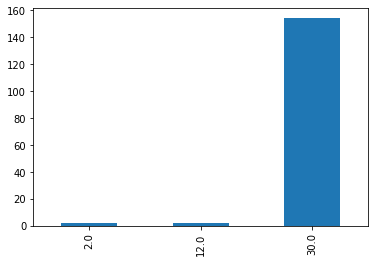

In [ ]:
data_24[data_24['slam']>10**12]['cuorg'].value_counts().sort_index().plot.bar()

*   ID 10466537 的信用額度為 $6\times10^{110}$, 非常的大，可以重點觀察一下他的其他筆資料。
*   (注:在其他資料data_1有看到更大的:10^217)
*   原本因為沒有slam值的都是副卡，但發現副卡仍有有slam值的資料，因此要注意這個邏輯推理的正確性。
*   大部分的cuorg(客戶來源)都是30，可能是某種特殊背景的客戶有較大的信用額度。






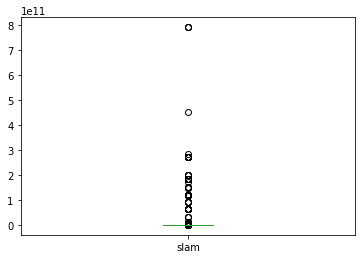

In [ ]:
i = data_24[data_24['slam']>10**12].index
temp = data_24.drop(i)
temp['slam'].plot.box()

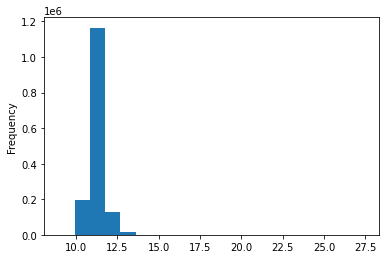

In [ ]:
temp['slam'].apply(lambda x: np.log(x)).plot.hist(bins=20)

就算拿掉較大的slam值，slam的分佈看起來仍是非常右偏。

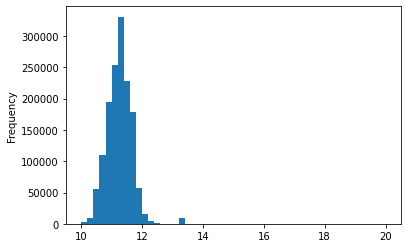

In [ ]:
data_24[data_24['primary_card']==1]['slam'].apply(lambda x: np.log(x)).plot.hist(bins=50, range=[10,20])

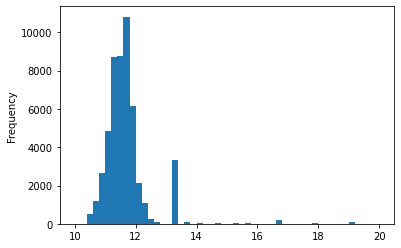

In [ ]:
data_24[data_24['primary_card']==0]['slam'].apply(lambda x: np.log(x)).plot.hist(bins=50, range=[10,20])

看起來，副卡的slam值似乎較正卡的大(或是代表有副卡的其正卡的信用額度會較高?)

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10466537])
display(pd.concat(comb))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
473132,473132,1,10466537,10,1,31505.231085,0,1,0,0,0.00,1.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
473145,473145,1,10466537,other,5,61040.235823,0,1,3,1,0.00,0.01,0.99,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
473155,473155,1,10466537,32,52,50762.595584,0,0,0,52,0.00,0.00,0.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
493422,1455026,2,10466537,other,2,7386.579870,0,1,0,1,0.00,0.95,0.00,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
493432,1455036,2,10466537,32,8,40907.678802,0,5,0,3,0.00,0.96,0.00,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
526075,2491797,3,10466537,other,2,7374.223414,0,1,0,1,0.00,0.96,0.00,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
526084,2491806,3,10466537,32,42,45536.946167,0,0,0,42,0.00,0.00,0.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
526086,2491808,3,10466537,48,1,155614.637080,0,0,0,1,0.00,0.00,0.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
524876,3561521,4,10466537,15,1,16084.241823,1,0,0,0,1.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0
524898,3561543,4,10466537,other,4,33028.531313,0,1,0,3,0.00,0.03,0.00,0.97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,12.0,1.0,2.0,30.0,6.151170e+110,1.0,5.0,0


In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10100133])
display(pd.concat(comb))

(data_1中最大的那個ID)觀察發現，ID 10100133的slam值都非常的大，但似乎有再調降，基本上都是用同一張卡(card3)、國內消費為主，消費金額看起來並沒有特別誇張，目前看起來應該是合理的。

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['primary_card']==0])
display(pd.concat(comb))

In [ ]:
data_24[(~np.isnan(data_24['slam'])) & (data_24['primary_card']==0)]

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
0,31391240,24,10048145,45,1,2262.383305,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,15.0,1.0,99.0,30.0,1.622014e+07,0.0,2.0,0
10,31391309,24,10424420,2,1,1332.986072,0,1,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,15.0,1.0,99.0,30.0,8.739710e+04,0.0,2.0,0
12,31391316,24,10424420,other,1,2483.551527,0,1,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,15.0,1.0,99.0,30.0,8.739710e+04,0.0,2.0,0
14,31391322,24,10424420,36,1,889.020921,0,1,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,15.0,1.0,99.0,30.0,8.739710e+04,0.0,2.0,0
17,31391330,24,10424420,37,2,3470.681163,0,2,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,15.0,1.0,99.0,30.0,8.739710e+04,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584235,32975593,24,10053034,10,2,8810.871748,0,2,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,13.0,1.0,99.0,30.0,1.939660e+05,0.0,3.0,0
1584242,32975600,24,10053034,13,2,4877.167074,0,2,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,13.0,1.0,99.0,30.0,1.939660e+05,0.0,3.0,0
1584250,32975608,24,10053034,15,12,11567.780747,0,12,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,13.0,1.0,99.0,30.0,1.939660e+05,0.0,3.0,0
1584251,32975609,24,10053034,36,1,5773.036485,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,13.0,1.0,99.0,30.0,1.939660e+05,0.0,3.0,0


再次確認有slam值與否和是否為副卡並代表完全相同的意義，即就算是使用副卡仍會標註正卡的信用額度。
如要補值，也許可以找出同一個ID(chid)、同一個月份(dt)為正卡的slam值來補；但似乎有NA值者會沒有正卡的資料(如ID 10267183)，因此可能就無法補。

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10267183])
display(pd.concat(comb))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
4,4,1,10267183,2,1,21701.307598,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
34,961604,2,10267183,other,1,13145.795658,0,0,0,1,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
6,1965627,3,10267183,10,1,5173.083689,0,0,1,0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
7,1965628,3,10267183,37,1,11667.256981,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
67,3036710,4,10267183,10,1,5205.435012,0,0,1,0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
0,4106095,5,10267183,10,1,5179.573557,0,0,1,0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
1,4106101,5,10267183,37,1,13983.825336,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
5,5261038,6,10267183,10,1,5205.435012,0,0,1,0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
7,5261045,6,10267183,12,1,15262.222603,0,1,0,0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
8,5261049,6,10267183,37,1,13927.859147,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0


## gender_code

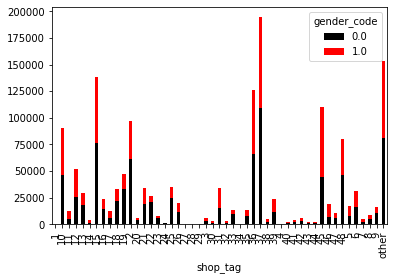

In [ ]:
pd.crosstab(data_24.shop_tag, data_24.gender_code).plot(kind='bar', stacked=True, color=['black','red'])
plt.show()

In [ ]:
data_24[data_24['gender_code'].isna()]

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
2483,31393841,24,10435279,5,1,4684.483372,0,0,0,1,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,1.0,1.0,30.0,NaN,NaN,NaN,0
2484,31393842,24,10435279,36,13,8034.598034,0,13,0,0,0.0,1.0,0.0,0.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,1.0,1.0,30.0,NaN,NaN,NaN,0
2556,31393914,24,10382097,10,3,4482.043943,0,0,0,3,0.0,0.0,0.0,1.0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,2.0,99.0,30.0,NaN,NaN,NaN,0
2557,31393915,24,10382097,15,1,7983.015026,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,2.0,99.0,30.0,NaN,NaN,NaN,0
2562,31393920,24,10429788,2,6,7620.184417,6,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,12.0,1.0,1.0,30.0,79291.240239,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584046,32975404,24,10120967,31,5,2688.055269,5,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,12.0,1.0,8.0,30.0,49961.938964,NaN,NaN,1
1584052,32975410,24,10268222,other,1,5773.036485,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,12.0,1.0,99.0,30.0,59701.507360,NaN,NaN,1
1584054,32975412,24,10268222,36,4,10921.166563,4,0,0,0,1.0,0.0,0.0,0.0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,12.0,1.0,99.0,30.0,59701.507360,NaN,NaN,1
1584055,32975413,24,10120967,36,6,7901.016442,6,0,0,0,1.0,0.0,0.0,0.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,12.0,1.0,8.0,30.0,49961.938964,NaN,NaN,1


In [ ]:
len(np.unique(data_24[data_24['gender_code'].isna()]['chid']))

4512

**gender_code有NA的，age也會有NA，若這些ID有其他筆沒NA的資料則可補值**(但看起來應該是沒有)。

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10382097])
display(pd.concat(comb))

In [ ]:
pd.concat(comb)['gender_code'].describe()

## age

In [ ]:
data_24['age'].value_counts().sort_index().plot.bar()

NameError: ignored

age和gender_code的NA值目前沒有甚麼推測的原因，也不太好補。

## educd 教育水準

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['educd'].isna()])
display(pd.concat(comb))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
920107,12651878,11,10323841,6,2,21293.622280,2,0,0,0,1.00,0.00,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
920118,12651889,11,10323841,15,1,7439.804927,1,0,0,0,1.00,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
920128,12651899,11,10323841,19,1,5034.453815,1,0,0,0,1.00,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
920130,12651901,11,10323841,21,1,3046.423813,1,0,0,0,1.00,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
920142,12651913,11,10323841,37,4,16680.258529,4,0,0,0,1.00,0.00,0.0,0.0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
920151,12651922,11,10323841,40,2,23169.477146,2,0,0,0,1.00,0.00,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
920161,12651932,11,10323841,45,1,9489.549297,1,0,0,0,1.00,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
920165,12651936,11,10323841,46,1,32092.361327,1,0,0,0,1.00,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
920173,12651944,11,10323841,48,3,20773.267972,3,0,0,0,1.00,0.00,0.0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
842228,14031277,12,10323841,14,1,15537.849040,1,0,0,0,1.00,0.00,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1


In [ ]:
pd.unique(pd.concat(comb)['chid'])

array([10323841, 10232892, 10070695, 10128342, 10341771])

educd有NA值的只有五個ID，分別看一下。

In [ ]:
# 1
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10323841])
display(pd.concat(comb))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
767821,7225252,7,10323841,14,3,16979.039504,3,0,0,0,1.0,0.0,0.0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
767830,7225261,7,10323841,45,2,13311.619203,2,0,0,0,1.0,0.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
767839,7225270,7,10323841,48,3,17424.973924,3,0,0,0,1.0,0.0,0.0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
822362,8496083,8,10323841,48,1,14388.592228,1,0,0,0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
822584,8496305,8,10323841,14,2,12991.458122,2,0,0,0,1.0,0.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002286,32393644,24,10323841,37,4,8479.604575,4,0,0,0,1.0,0.0,0.0,0.0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
1002295,32393653,24,10323841,45,6,18032.483223,6,0,0,0,1.0,0.0,0.0,0.0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
1002304,32393662,24,10323841,46,1,28875.959438,1,0,0,0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1
1002518,32393876,24,10323841,14,3,18368.559978,3,0,0,0,1.0,0.0,0.0,0.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,30.0,112010.611717,1.0,4.0,1


In [ ]:
print(pd.concat(comb)['educd'].to_string())

767821     4.0
767830     4.0
767839     4.0
822362     4.0
822584     4.0
822589     4.0
822591     4.0
822600     4.0
850893     4.0
850902     4.0
850911     4.0
850920     4.0
850929     4.0
850938     4.0
850950     4.0
850959     4.0
889152     4.0
889156     4.0
889164     4.0
889166     4.0
889175     4.0
889184     4.0
920107     NaN
920118     NaN
920128     NaN
920130     NaN
920142     NaN
920151     NaN
920161     NaN
920165     NaN
920173     NaN
842228     NaN
842237     NaN
842239     NaN
842248     NaN
855745     4.0
855754     4.0
855755     4.0
855764     4.0
855776     4.0
855787     4.0
874913     4.0
874922     4.0
874930     4.0
874939     4.0
874947     4.0
948786     4.0
948795     4.0
948803     4.0
948812     4.0
948821     4.0
948830     4.0
968572     4.0
968581     4.0
968589     4.0
968591     4.0
968601     4.0
968614     4.0
968623     4.0
968625     4.0
968636     4.0
1001971    4.0
1001975    4.0
1001977    4.0
1001990    4.0
1002000    4.0
1006163   

*   ID 10323841 的educd值看起來是突然中斷的，但學歷應該是較穩定的資訊，因此可以補為4.0。



In [ ]:
# 2,3,4
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  for j in (10232892,10070695,10128342):
    comb.append(df.loc[df['chid']==j])
display(pd.concat(comb).sort_values(by=['chid']))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
44428,31435786,24,10070695,other,1,1309.634076,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,0
1315940,32707298,24,10128342,37,1,1309.634076,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1315939,32707297,24,10128342,other,1,9247.090637,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1570892,32962250,24,10232892,36,1,5480.168714,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1491131,24961068,19,10232892,16,1,11080.508913,1,0,0,0,1.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1491132,24961069,19,10232892,17,13,38582.739970,0,13,0,0,0.00,1.00,0.0,0.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1491142,24961079,19,10232892,26,1,4756.920887,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1491143,24961080,19,10232892,36,1,1732.413809,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1491144,24961081,19,10232892,37,2,4135.986009,2,0,0,0,1.00,0.00,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1491153,24961090,19,10232892,39,1,7232.187387,1,0,0,0,1.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0


*   ID 10232892 只有第一筆資料的個人資訊部分全缺，其他筆資料的資訊都相同，因此可以用後面的資料去補。
*   ID 10070695 和 10128342 只有在最後一期才出現
*   另外，從這邊可以發現，並非所有slam為NA值的都是副卡

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10341771])
display(pd.concat(comb))

ID 10341771 的後面7個columns都是NaN，並且沒有可以參考的，難以補值。


## trdtp 行業別

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df.loc[(df['trdtp'].isna()) & (df['educd'].notna()) & (df['age'].notna())])
display(pd.concat(comb).sort_values(by=['chid']))

In [ ]:
pd.unique(pd.concat(comb)['chid'])

分別看一下這八個人。

In [ ]:
# 1
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10271204])
display(pd.concat(comb))

In [ ]:
print(pd.concat(comb)[['trdtp','dt']].to_string())

ID 10271204 從月份3之後的trdtp為NA值。

In [ ]:
# 2
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10321090])
display(pd.concat(comb))

In [ ]:
print(pd.concat(comb)[['trdtp','dt']].to_string())

這個人是從月份14之後有NA值。

In [ ]:
# 3
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10029517])
display(pd.concat(comb))

In [ ]:
print(pd.concat(comb)[['trdtp','dt','slam']].to_string())

這個人也是月份14之後有NA值，注意他在月份7有換過trdtp、月份5有提高過slam。

In [ ]:
# 4
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10395578])
display(pd.concat(comb))

In [ ]:
print(pd.concat(comb)[['trdtp','dt','slam']].to_string())

In [ ]:
# 5
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10138495])
display(pd.concat(comb))

In [ ]:
print(pd.concat(comb)[['trdtp','dt']].to_string())

In [ ]:
# 6
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10240494])
display(pd.concat(comb))

In [ ]:
print(pd.concat(comb)[['trdtp','dt']].to_string())

In [ ]:
# 7
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10215760])
display(pd.concat(comb))

In [ ]:
print(pd.concat(comb)[['trdtp','dt']].to_string())

這個人在月份23有NA值，前後則是有不同的trdtp。

In [ ]:
# 8
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10333465])
display(pd.concat(comb))

In [ ]:
print(pd.concat(comb)[['trdtp','dt']].to_string())

整體來看，合理的猜測trdtp中NA的意思是無業，因此也許可以新增一個行業代號來表示。

In [ ]:
data_24["trdtp"].unique()

## masts 婚姻


In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df.loc[(df['masts'].isna())])
display(pd.concat(comb).sort_values(by=['chid']))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
44428,31435786,24,10070695,other,1,1309.634076,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,0
1315939,32707297,24,10128342,other,1,9247.090637,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1315940,32707298,24,10128342,37,1,1309.634076,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1342368,15863855,13,10232892,17,1,6949.712358,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0
1563803,32955161,24,10341771,10,1,8970.118318,0,1,0,0,0.00,1.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563804,32955162,24,10341771,15,2,5581.891920,1,1,0,0,0.37,0.63,0.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563813,32955171,24,10341771,19,1,8271.840706,0,1,0,0,0.00,1.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563825,32955183,24,10341771,36,3,5014.272132,3,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563826,32955184,24,10341771,37,1,7168.317661,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563827,32955185,24,10341771,48,1,2891.116374,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1


In [ ]:
# 1
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10070695])
display(pd.concat(comb))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
44428,31435786,24,10070695,other,1,1309.634076,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,0


In [ ]:
# 2
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10128342])
display(pd.concat(comb))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
1315939,32707297,24,10128342,other,1,9247.090637,0,1,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1315940,32707298,24,10128342,37,1,1309.634076,0,1,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1


In [ ]:
# 3
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10232892])
display(pd.concat(comb))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
1342368,15863855,13,10232892,17,1,6949.712358,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0
1373542,17248551,14,10232892,12,1,4427.805435,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1373546,17248555,14,10232892,15,1,7460.139644,1,0,0,0,1.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1373551,17248560,14,10232892,17,41,59393.962744,3,38,0,0,0.08,0.92,0.0,0.0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1373557,17248566,14,10232892,36,3,6684.120057,1,2,0,0,0.74,0.26,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1373560,17248569,14,10232892,38,1,8338.413329,0,0,0,1,0.00,0.00,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1373567,17248576,14,10232892,45,10,13747.813911,10,0,0,0,1.00,0.00,0.0,0.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1488463,18748985,15,10232892,12,1,3046.423813,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1488465,18748987,15,10232892,15,2,13004.271666,2,0,0,0,1.00,0.00,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0
1488466,18748988,15,10232892,16,1,21776.078218,1,0,0,0,1.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,4.0,8.0,1.0,4.0,30.0,NaN,1.0,4.0,0


ID 10232892 只有第一筆資料的個人資訊部分全部缺失，如要補值應可用下一個月的資料去補。(如果這筆資料還要的話)

In [ ]:
# 4
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df[df['chid']==10341771])
display(pd.concat(comb))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
1563803,32955161,24,10341771,10,1,8970.118318,0,1,0,0,0.00,1.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563804,32955162,24,10341771,15,2,5581.891920,1,1,0,0,0.37,0.63,0.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563813,32955171,24,10341771,19,1,8271.840706,0,1,0,0,0.00,1.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563825,32955183,24,10341771,36,3,5014.272132,3,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563826,32955184,24,10341771,37,1,7168.317661,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563827,32955185,24,10341771,48,1,2891.116374,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1


除了 ID 10232892 之外，都是全部NA值，很難補。
## naty 國籍 與其他

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  comb.append(df.loc[(df['naty'].isna())])
display(pd.concat(comb).sort_values(by=['chid']))

,Unnamed: 0,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
44428,31435786,24,10070695,other,1,1309.634076,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,0
1315939,32707297,24,10128342,other,1,9247.090637,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1315940,32707298,24,10128342,37,1,1309.634076,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1342368,15863855,13,10232892,17,1,6949.712358,0,1,0,0,0.00,1.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0
1563803,32955161,24,10341771,10,1,8970.118318,0,1,0,0,0.00,1.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563804,32955162,24,10341771,15,2,5581.891920,1,1,0,0,0.37,0.63,0.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563813,32955171,24,10341771,19,1,8271.840706,0,1,0,0,0.00,1.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563825,32955183,24,10341771,36,3,5014.272132,3,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563826,32955184,24,10341771,37,1,7168.317661,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1
1563827,32955185,24,10341771,48,1,2891.116374,1,0,0,0,1.00,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1


和masts的資料是同樣的ID，狀況是相同的。從全部NA值總和的表中，可推知poscd、curog也是同一堆的資料。

#slam的EDA

In [ ]:
# 只看'dt','chid','shop_tag','txn_cnt','txn_amt','slam'
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  dat = df.drop(df.columns[0],axis = 1)
  del df
  comb.append(dat[['dt','chid','shop_tag','txn_cnt','txn_amt','slam','primary_card']])
  del dat
dat = pd.concat(comb,axis = 0)

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32975653 entries, 0 to 1584294
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   dt            int64  
 1   chid          int64  
 2   shop_tag      object 
 3   txn_cnt       int64  
 4   txn_amt       float64
 5   slam          float64
 6   primary_card  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.0+ GB


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


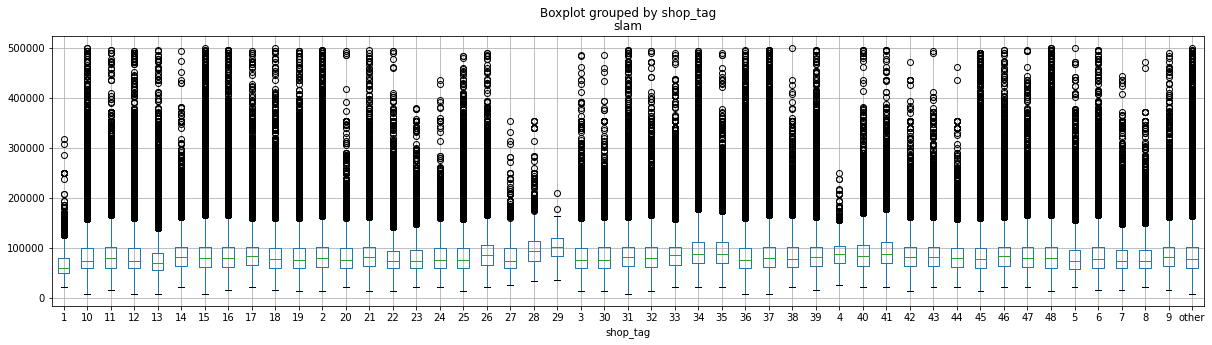

In [ ]:
dat[dat['slam']<5*10**5].boxplot(column=['slam'], by='shop_tag', figsize = (20,5))

In [ ]:
## 1207
dat['slam'] = dat['slam'].apply(lambda x: 1/x)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


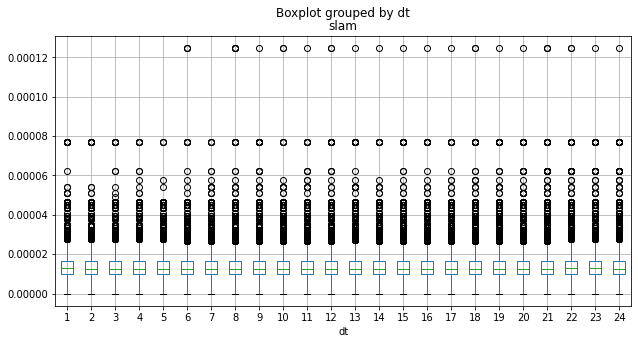

In [ ]:
dat.boxplot(column=['slam'], by='dt', figsize = (10,5))
# dat[dat['slam']<5*10**5].boxplot(column=['slam'], by='dt', figsize = (10,5))

不同的消費類別下，slam的分布並沒有太大差別，除了有部分類別有特別大的outlier。

In [ ]:
# 隨機挑1%來看
random.seed(2021)
index = random.choices(range(1,len(dat.index)), k=int(len(dat.index)*0.01))

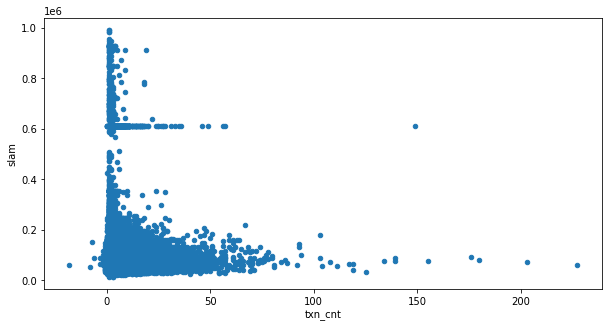

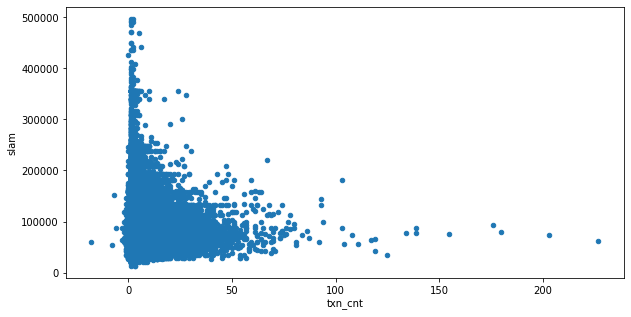

In [ ]:
dat.iloc[index][dat.iloc[index]['slam']<10**6].plot.scatter(x='txn_cnt', y='slam', figsize = (10,5))
dat.iloc[index][dat.iloc[index]['slam']<5*10**5].plot.scatter(x='txn_cnt', y='slam', figsize = (10,5))

在slam小於10的6次方的資料中，可看到slam和txn_cnt的關係為：
*   在slam小於50000時，略呈現正向關係
*   整體呈現負向關係，愈大的slam值txt_cnt愈小
*   在slam=0.6*10^6的地方有一個水平線，有可能都是同 個人的消費，或是銀行的slam值有某個特定的級距






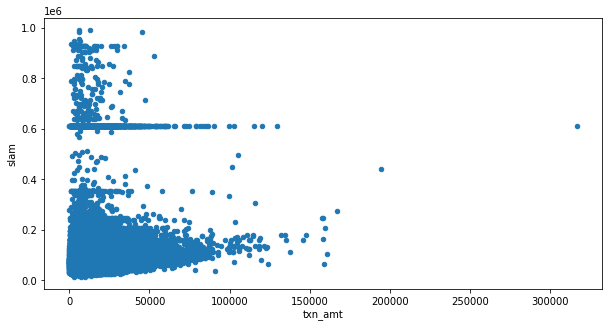

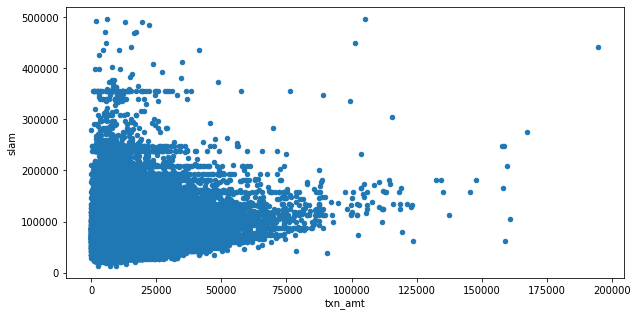

In [ ]:
dat.iloc[index][(dat.iloc[index]['slam']<10**6) & (dat.iloc[index]['txn_amt']<5*10**5)].plot.scatter(x='txn_amt', y='slam', figsize = (10,5))
dat.iloc[index][(dat.iloc[index]['slam']<5*10**5) & (dat.iloc[index]['txn_amt']<5*10**5)].plot.scatter(x='txn_amt', y='slam', figsize = (10,5))

在slam小於10的6次方的資料中，可看到slam和txn_amt的關係為：
*   在slam小於100000時，呈現正向關係(合邏輯:愈高的額度花費金額愈高花費金額愈高)
*   整體呈現負向關係，愈大的slam值txn_amt愈小，和txn_cnt相似
*   在slam=600000&370000的地方有一個水平線，有可能都是同 個人的消費，或是銀行的slam值有某個特定的級距
*   但基本上都集中在兩者都小的情況


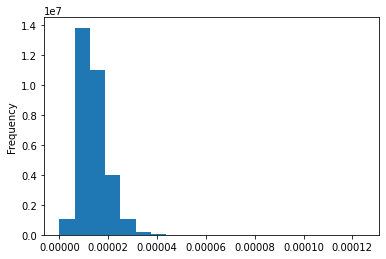

In [ ]:
dat['slam'].apply(lambda x: 1/x).plot.hist(bins=20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


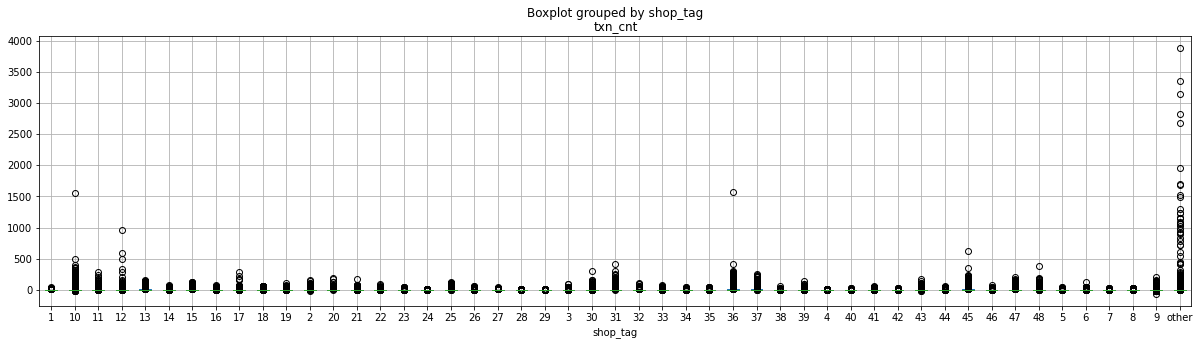

In [ ]:
dat.boxplot(column=['txn_cnt'], by='shop_tag', figsize = (20,5))

用附卡並且slam是NA值，有1749898個

In [ ]:
dat[(dat['slam'].isna())&(dat['primary_card']==0)].describe()

,dt,chid,txn_cnt,txn_amt,slam,primary_card
count,1.749898e+06,1.749898e+06,1.749898e+06,1.749898e+06,0.0,1749898.0
mean,1.327300e+01,1.025049e+07,2.568431e+00,2.642162e+51,NaN,0.0
std,6.786714e+00,1.439909e+05,3.490496e+00,3.475812e+54,NaN,0.0
min,1.000000e+00,1.000005e+07,-1.600000e+01,2.237085e+01,NaN,0.0
25%,8.000000e+00,1.012598e+07,1.000000e+00,5.773036e+03,NaN,0.0
50%,1.400000e+01,1.025024e+07,1.000000e+00,8.584218e+03,NaN,0.0
75%,1.900000e+01,1.037536e+07,3.000000e+00,1.297312e+04,NaN,0.0
max,2.400000e+01,1.049998e+07,1.860000e+02,4.597862e+57,NaN,0.0


用正卡並且slam是NA值，有8個，並且都是在dt為24的

In [ ]:
dat[(dat['slam'].isna())&(dat['primary_card']==1)].describe()

,dt,chid,txn_cnt,txn_amt,slam,primary_card
count,8.0,8.000000e+00,8.000000,8.000000,0.0,8.0
mean,24.0,1.028841e+07,1.375000,6056.785228,NaN,1.0
std,0.0,9.879843e+04,0.744024,2895.237320,NaN,0.0
min,24.0,1.012834e+07,1.000000,1309.634076,NaN,1.0
25%,24.0,1.028841e+07,1.000000,4483.483192,NaN,1.0
50%,24.0,1.034177e+07,1.000000,6375.104790,NaN,1.0
75%,24.0,1.034177e+07,1.250000,8446.410109,NaN,1.0
max,24.0,1.034177e+07,3.000000,9247.090637,NaN,1.0


In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  df = df.drop(df.columns[0],axis = 1)
  dat = df[(df['slam'].isna())&(df['primary_card']==0)]
  del df
  comb.append(dat)
  del dat
dat = pd.concat(comb,axis = 0)

用附卡且slam為NA的，有1749898個

In [ ]:
dat.shape

(1749898, 53)

dt


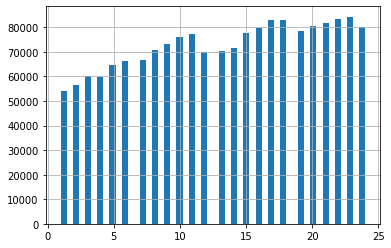

chid


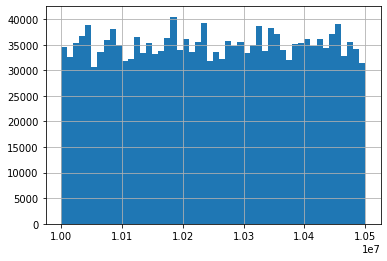

shop_tag


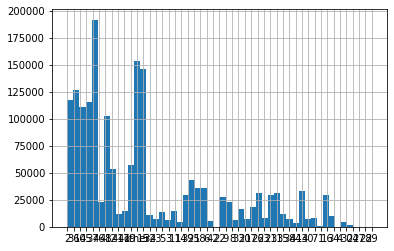

txn_cnt


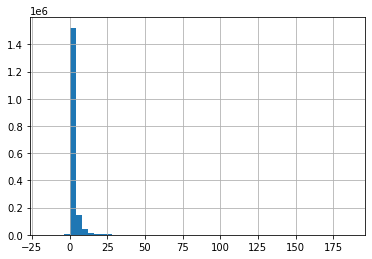

txn_amt


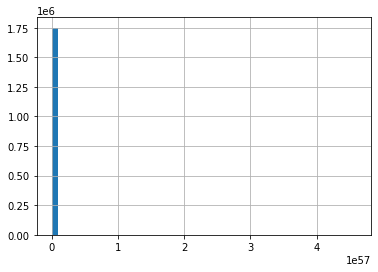

domestic_offline_cnt


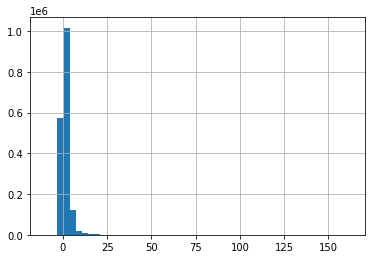

domestic_online_cnt


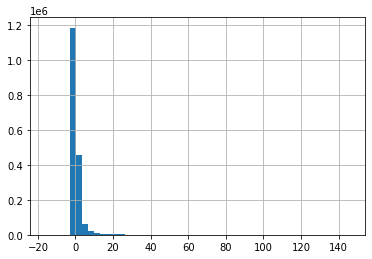

overseas_offline_cnt


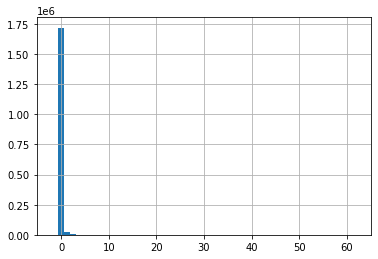

overseas_online_cnt


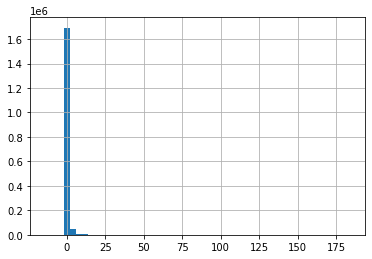

domestic_offline_amt_pct


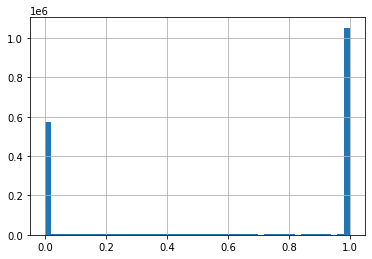

domestic_online_amt_pct


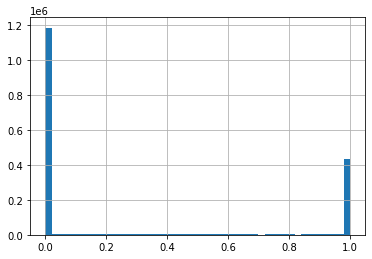

overseas_offline_amt_pct


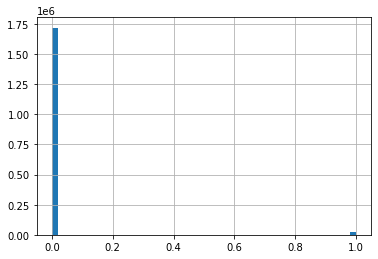

overseas_online_amt_pct


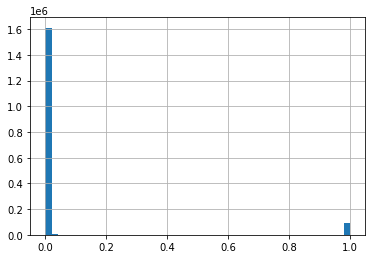

card_1_txn_cnt


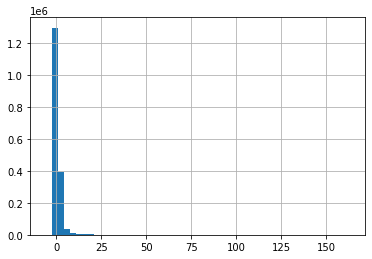

card_2_txn_cnt


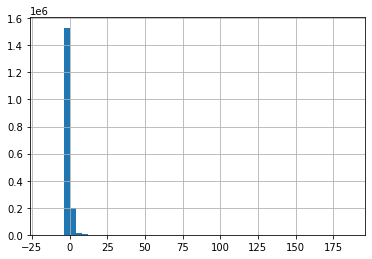

card_3_txn_cnt


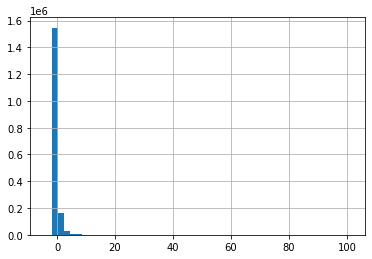

card_4_txn_cnt


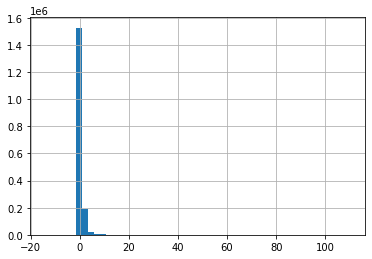

card_5_txn_cnt


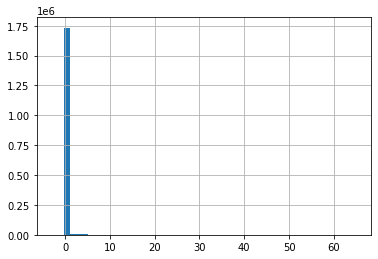

card_6_txn_cnt


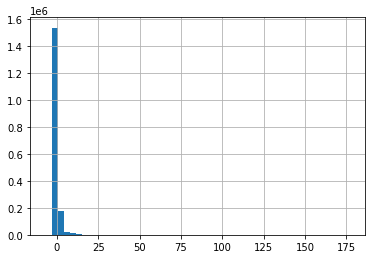

card_7_txn_cnt


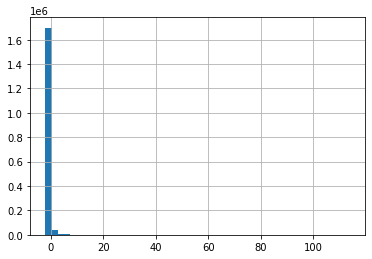

card_8_txn_cnt


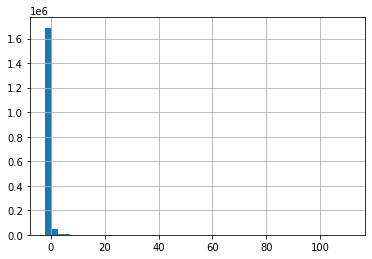

card_9_txn_cnt


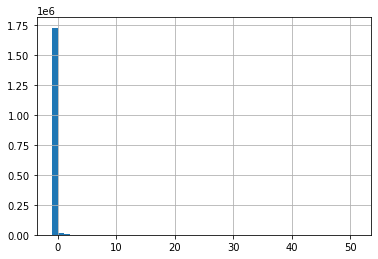

card_10_txn_cnt


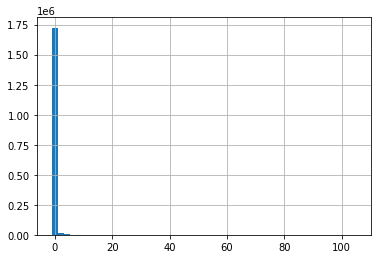

card_11_txn_cnt


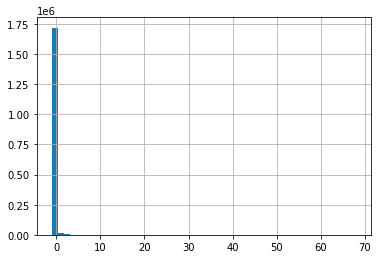

card_12_txn_cnt


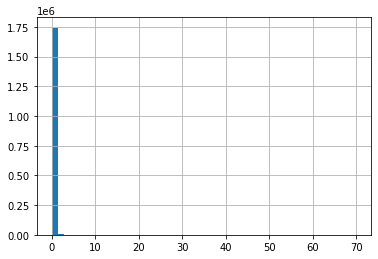

card_13_txn_cnt


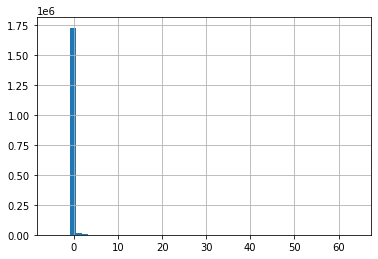

card_14_txn_cnt


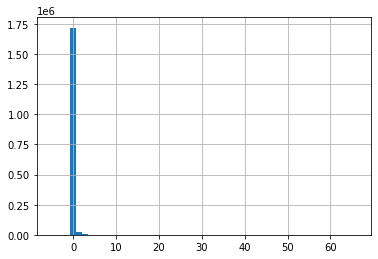

card_other_txn_cnt


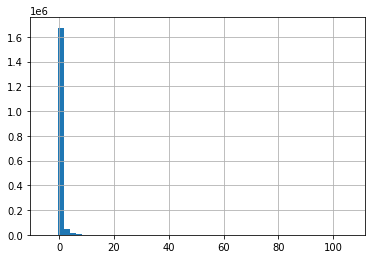

card_1_txn_amt_pct


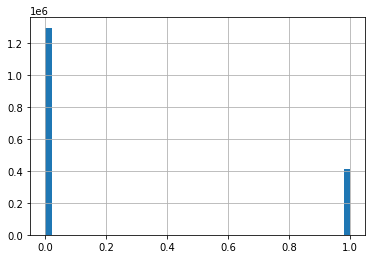

card_2_txn_amt_pct


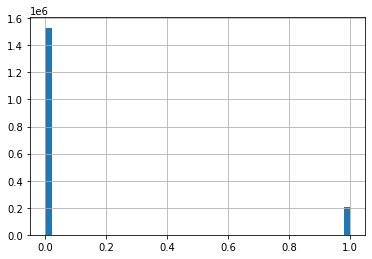

card_3_txn_amt_pct


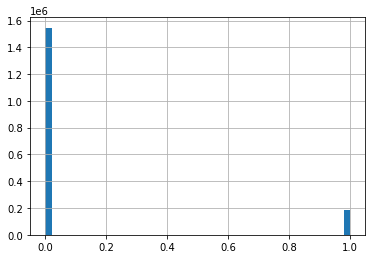

card_4_txn_amt_pct


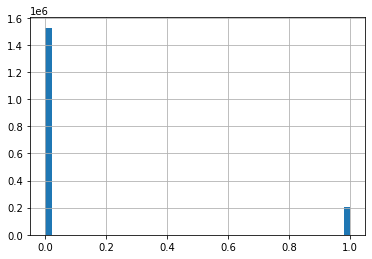

card_5_txn_amt_pct


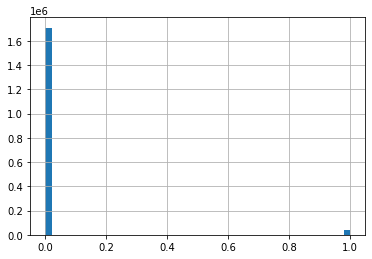

card_6_txn_amt_pct


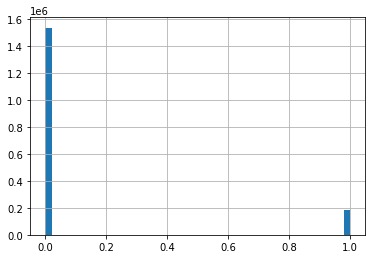

card_7_txn_amt_pct


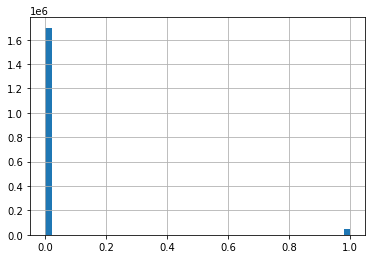

card_8_txn_amt_pct


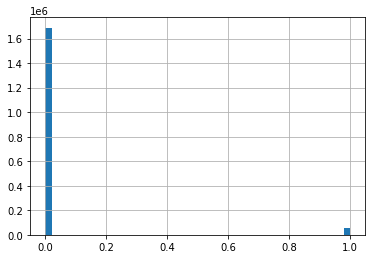

card_9_txn_amt_pct


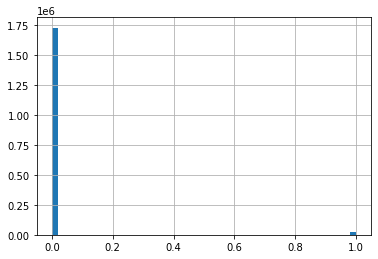

card_10_txn_amt_pct


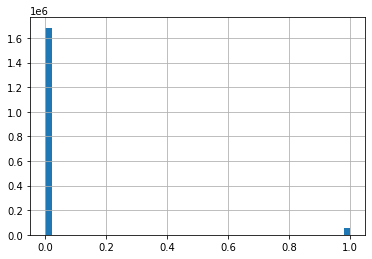

card_11_txn_amt_pct


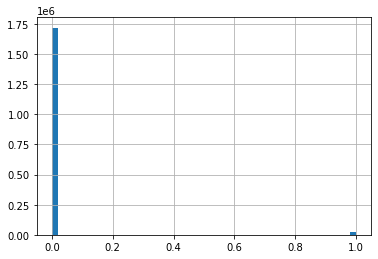

card_12_txn_amt_pct


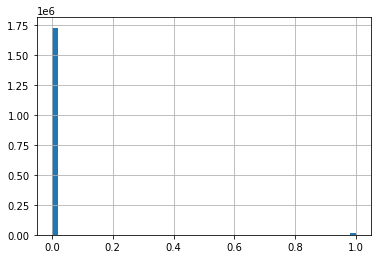

card_13_txn_amt_pct


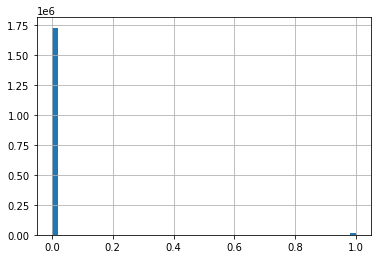

card_14_txn_amt_pct


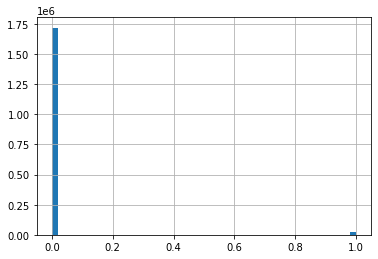

card_other_txn_amt_pct


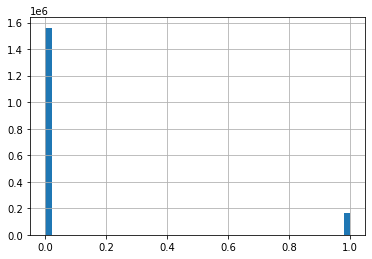

masts


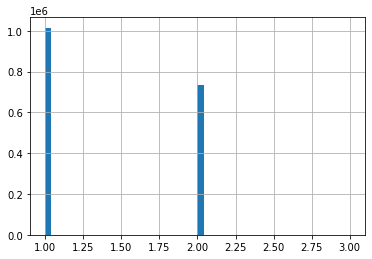

educd


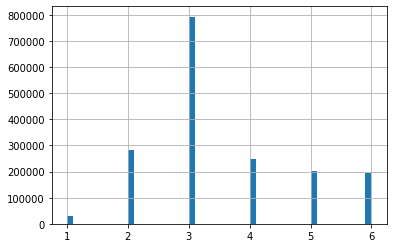

trdtp


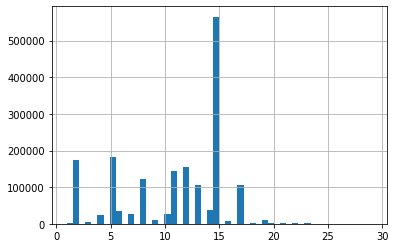

naty


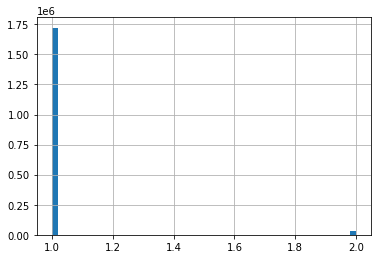

poscd


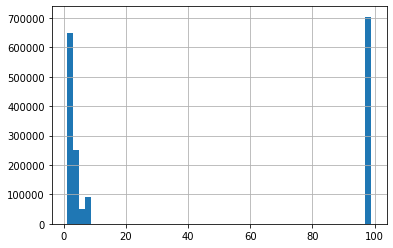

cuorg


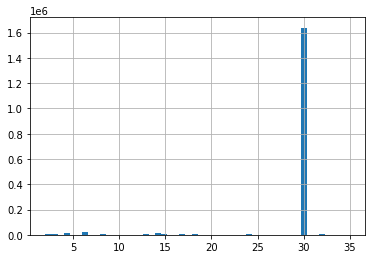

gender_code


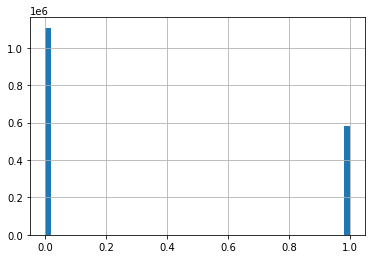

age


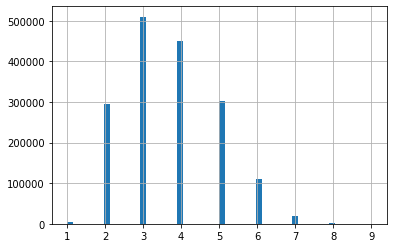

primary_card


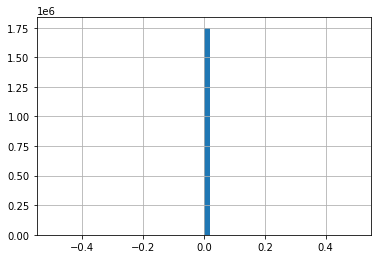

NameError: ignored

In [ ]:
col = dat.columns
for i in col:
  if i != 'slam':
    print(i)
    dat[i].hist(bins = 50)
    plt.show()

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  df = df.drop(df.columns[0],axis = 1)
  dat = df[(~df['slam'].isna())&(df['primary_card']==0)]
  del df
  comb.append(dat)
  del dat
dat = pd.concat(comb,axis = 0)

用附卡且slam不為NA的，有1009793個

In [ ]:
dat.shape

(1009793, 53)

In [ ]:
dat.describe()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.009793e+06,1.003136e+06,1.003136e+06,1009793.0
mean,1.366040e+01,1.025163e+07,2.436904e+00,9.284092e+03,1.432223e+00,6.309412e-01,8.008869e-02,2.936513e-01,6.516031e-01,2.201251e-01,3.027751e-02,9.799588e-02,3.328653e-01,3.956187e-01,3.337268e-01,5.052263e-01,5.546483e-02,1.263744e-01,6.448153e-02,6.337239e-02,1.250454e-02,8.853795e-02,4.475670e-02,2.906734e-02,8.429549e-02,5.248303e-02,2.481291e-01,1.146706e-01,1.768781e-01,1.379037e-01,2.196406e-01,2.647502e-02,3.854326e-02,2.379812e-02,2.899851e-02,6.052062e-03,3.967246e-02,1.916273e-02,1.306871e-02,2.976917e-02,1.990055e-02,1.054666e-01,1.688579e+00,4.986787e+00,1.421196e+01,1.022658e+00,9.389848e+01,2.990148e+01,1.249711e+212,3.656593e-01,3.071476e+00,0.0
std,6.833788e+00,1.458348e+05,3.417263e+00,7.067686e+03,2.336809e+00,2.220727e+00,7.630911e-01,1.654815e+00,4.673844e-01,4.027305e-01,1.680384e-01,2.898386e-01,1.666347e+00,1.501484e+00,1.550759e+00,1.693141e+00,5.521523e-01,1.082862e+00,7.453207e-01,5.684013e-01,2.396513e-01,7.469750e-01,5.481153e-01,3.962416e-01,9.501170e-01,6.753132e-01,1.273272e+00,3.179912e-01,3.813845e-01,3.441322e-01,4.135734e-01,1.604702e-01,1.917282e-01,1.521650e-01,1.674790e-01,7.752001e-02,1.948684e-01,1.368371e-01,1.134615e-01,1.695091e-01,1.392412e-01,3.066412e-01,4.631945e-01,1.355885e+00,2.666323e+00,1.488111e-01,2.158148e+01,1.272900e+00,inf,4.816148e-01,1.458728e+00,0.0
min,1.000000e+00,1.000003e+07,-1.200000e+01,2.237085e+01,-3.000000e+00,-1.200000e+01,-3.000000e+00,-8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,-5.000000e+00,-1.200000e+01,-8.000000e+00,-2.000000e+00,-2.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-4.000000e+00,-8.000000e+00,-1.000000e+00,-3.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.139239e+04,0.000000e+00,1.000000e+00,0.0
25%,8.000000e+00,1.012617e+07,1.000000e+00,5.474112e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e

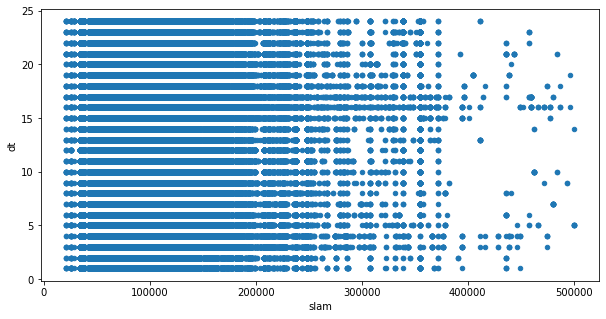

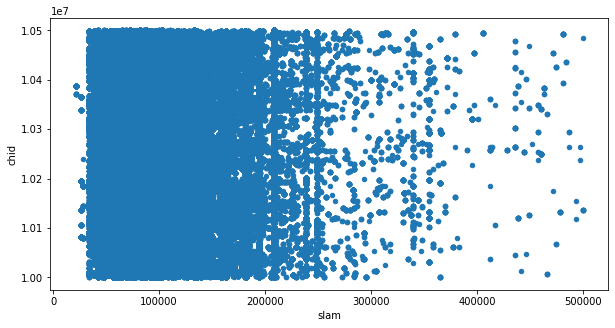

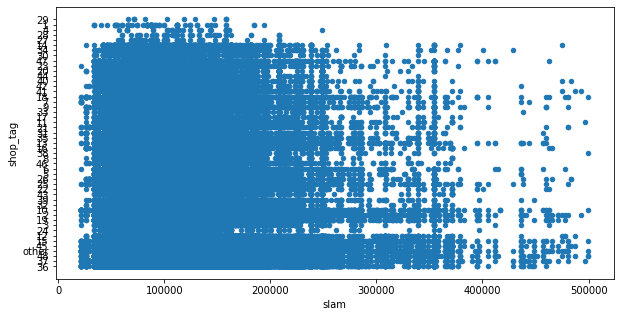

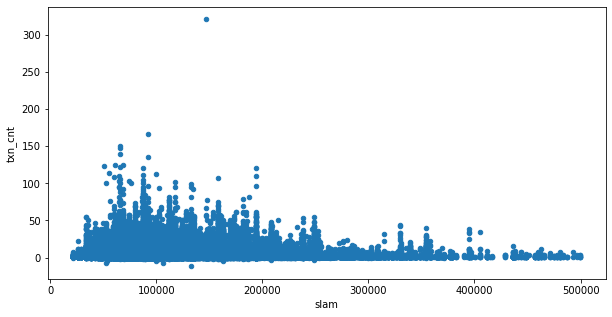

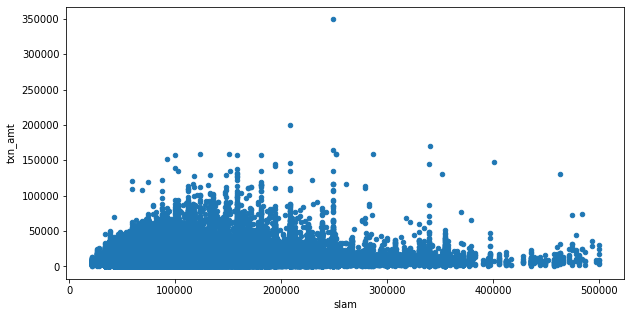

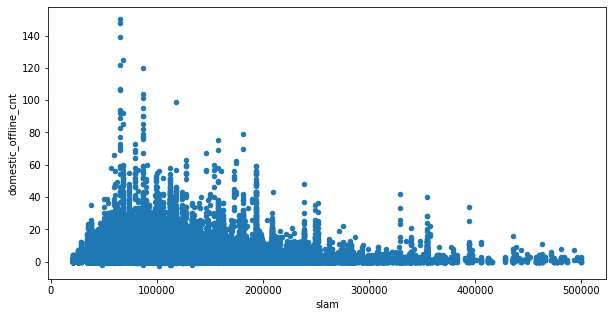

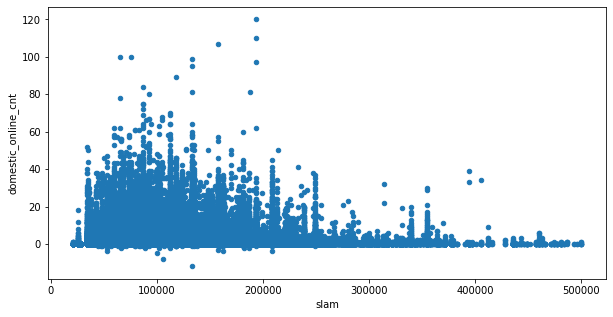

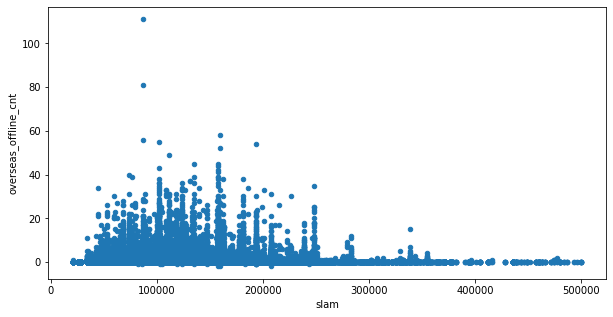

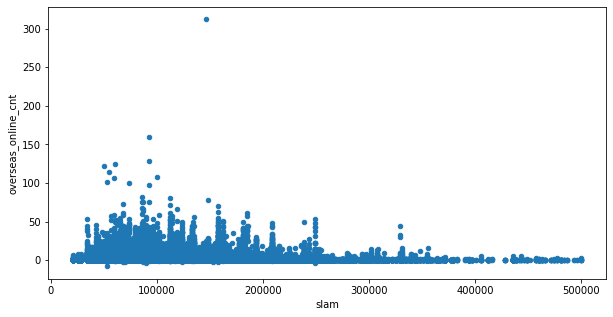

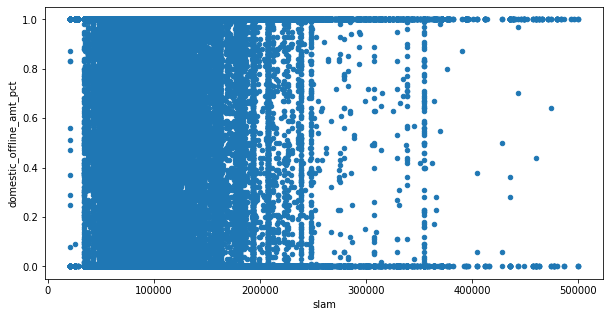

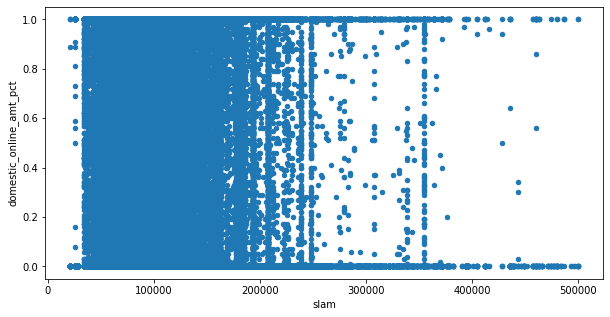

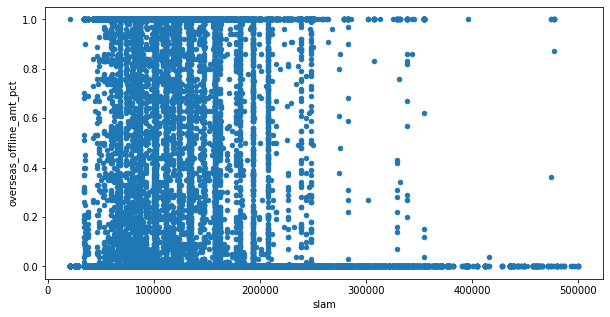

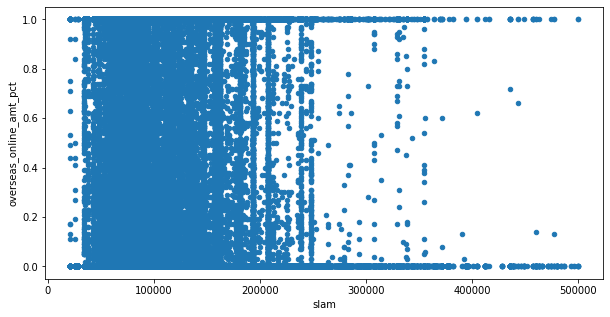

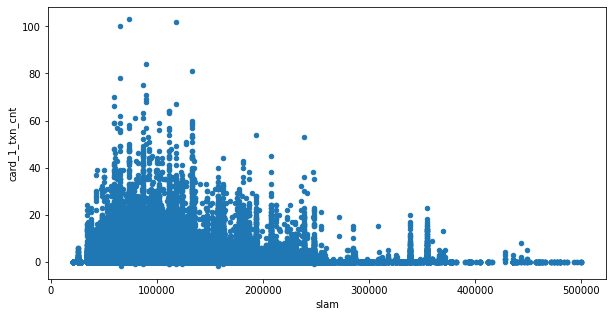

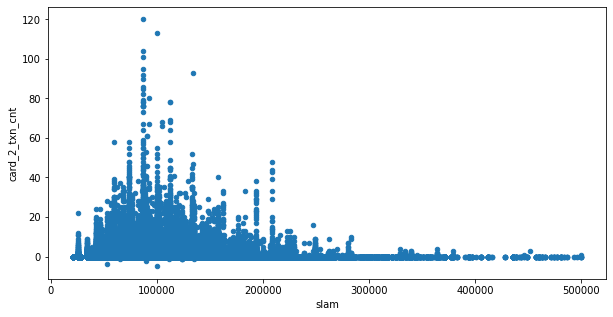

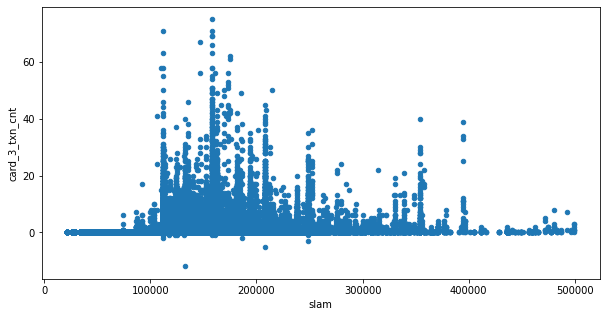

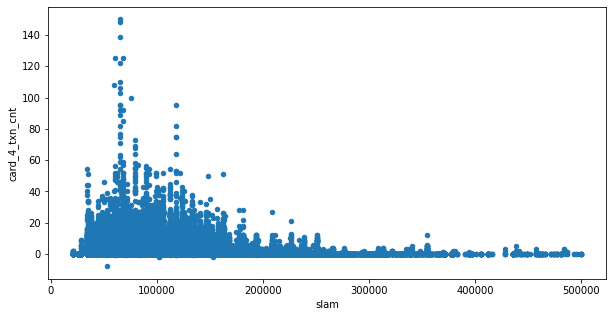

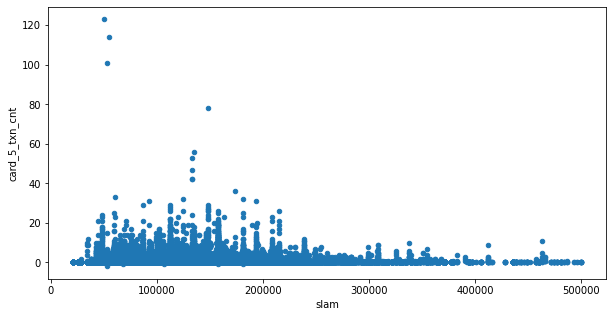

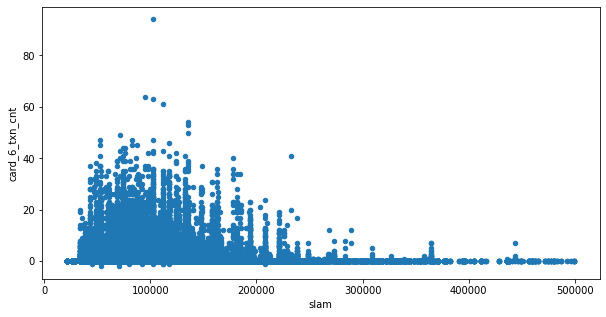

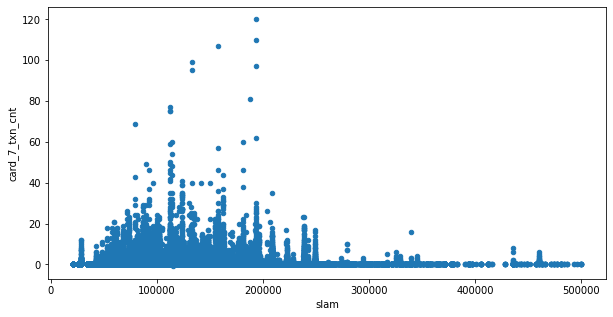

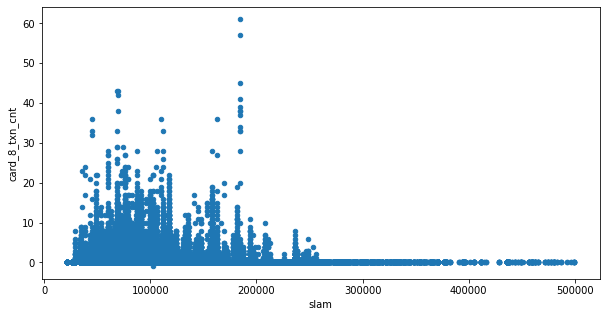

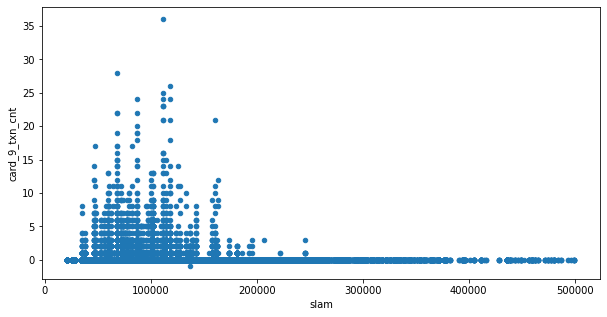

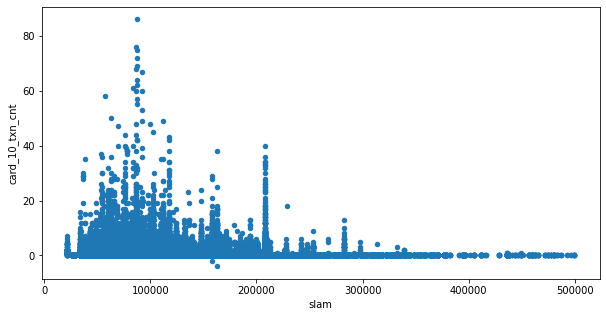

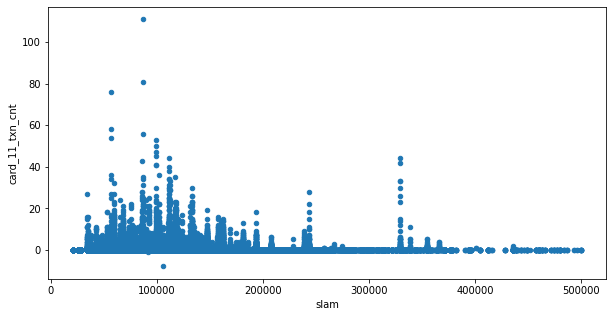

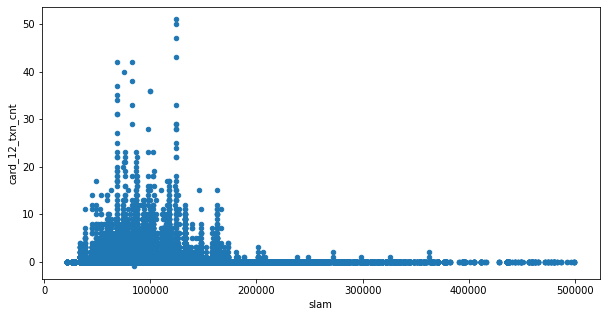

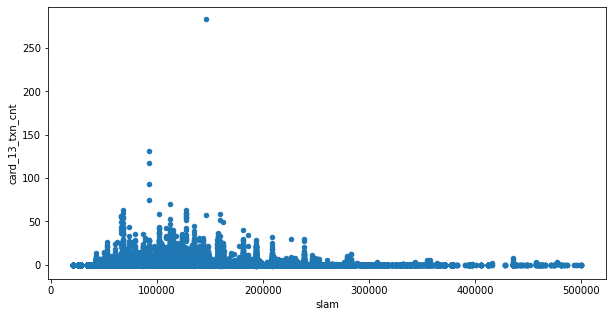

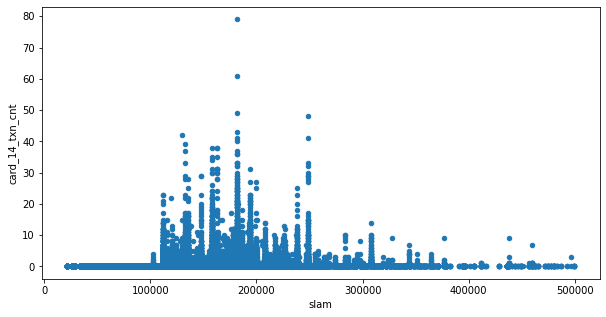

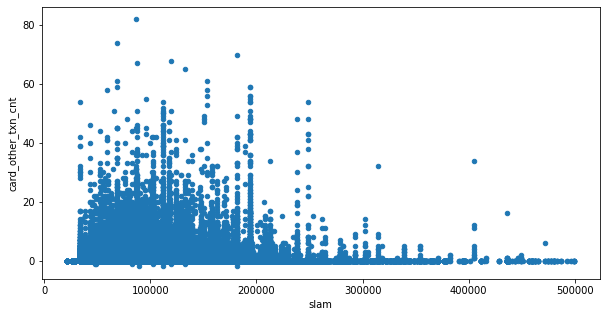

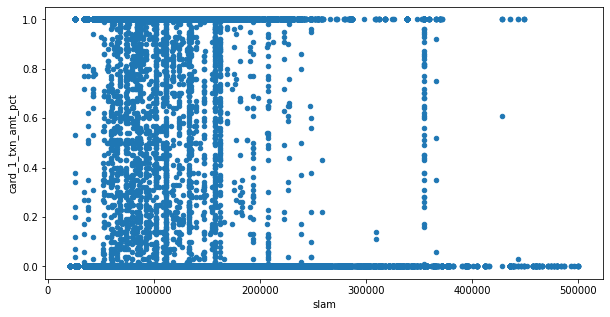

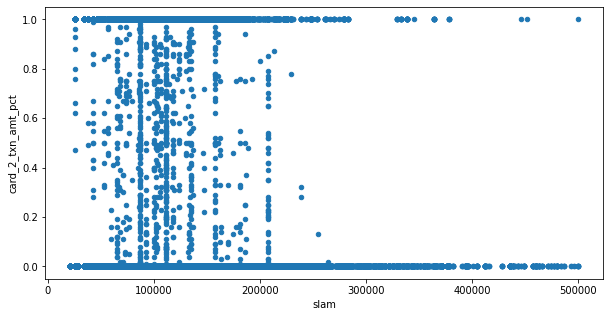

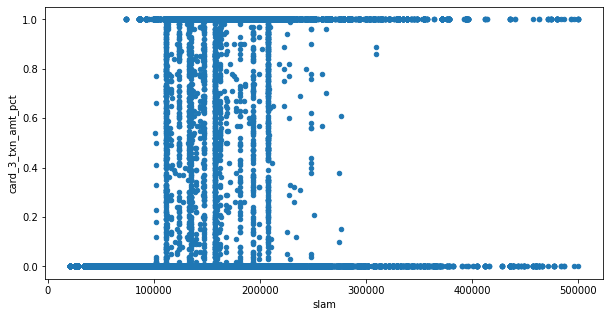

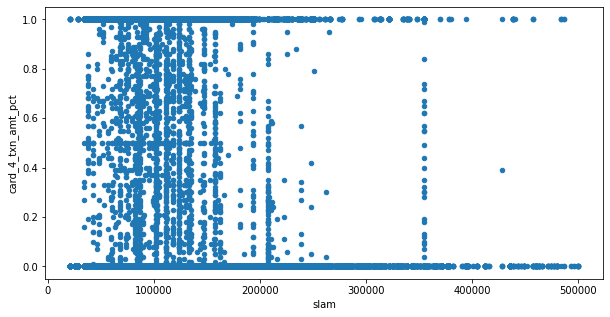

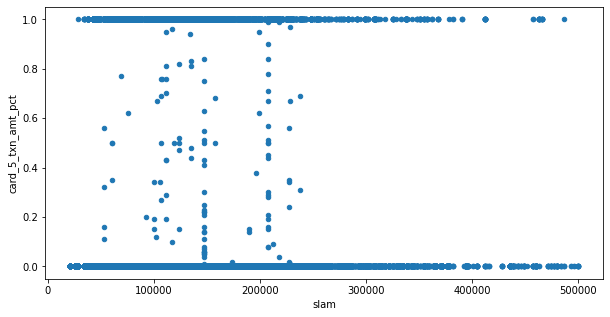

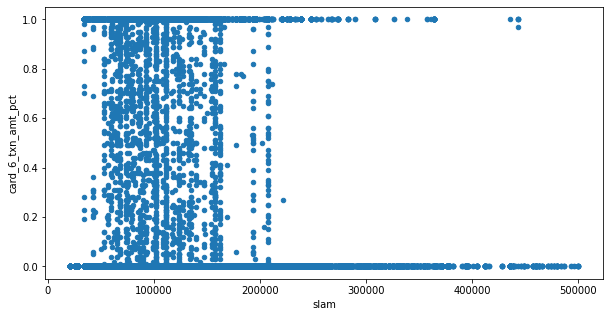

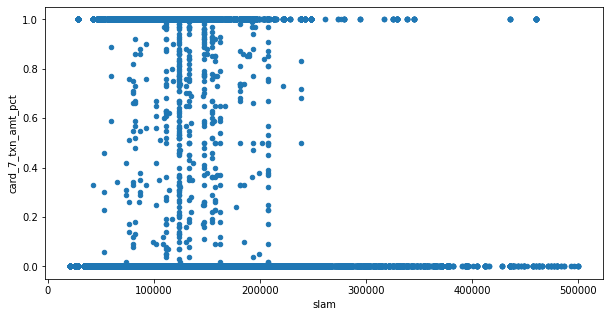

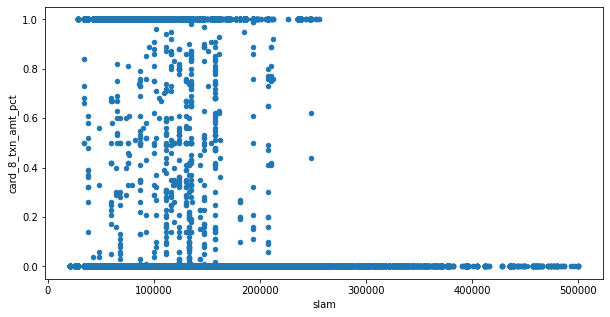

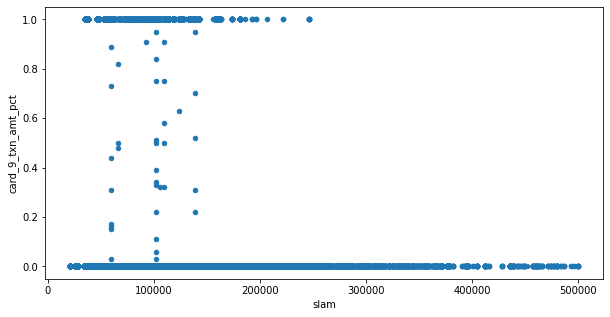

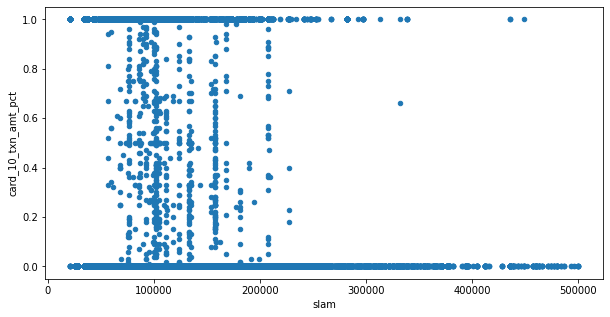

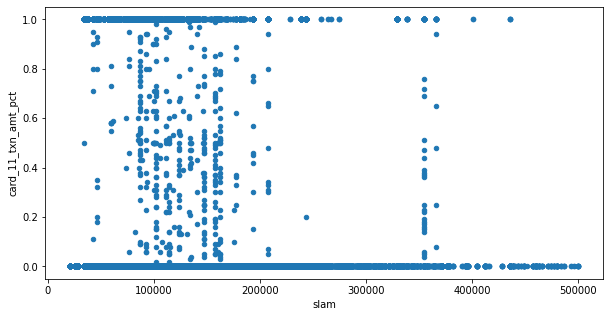

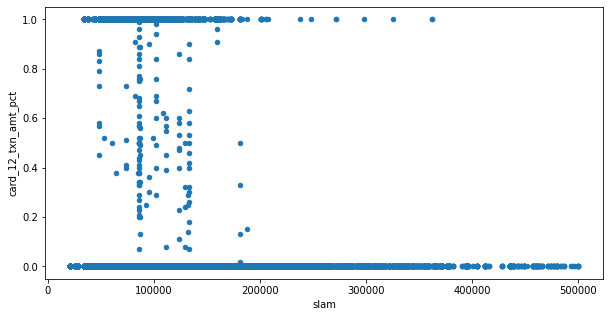

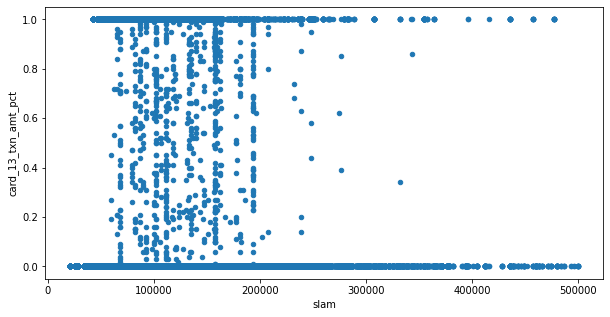

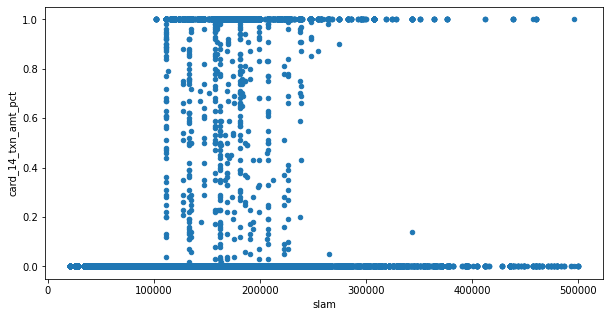

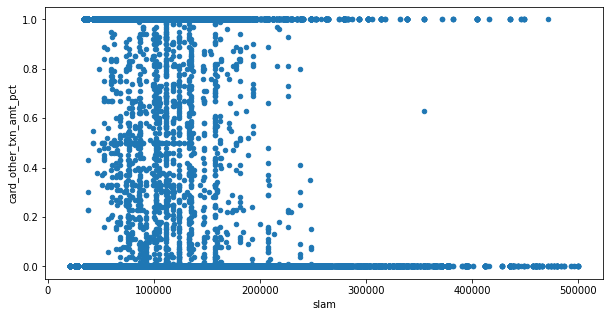

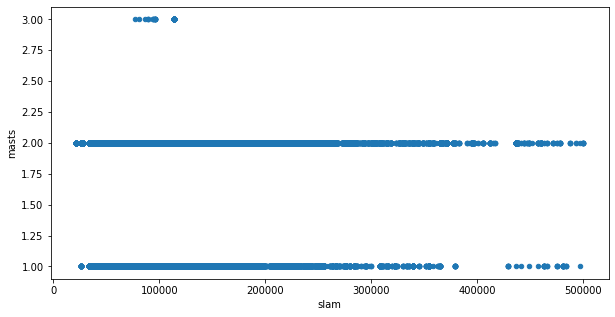

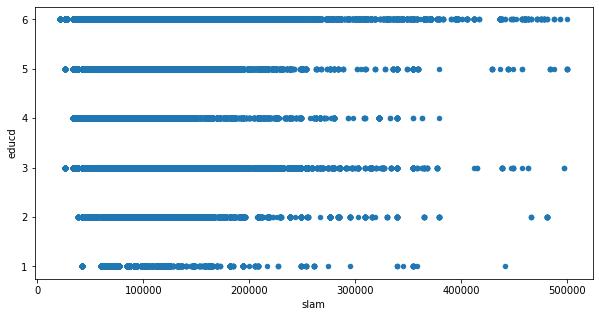

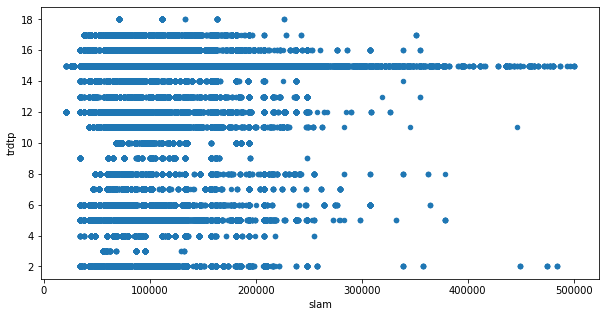

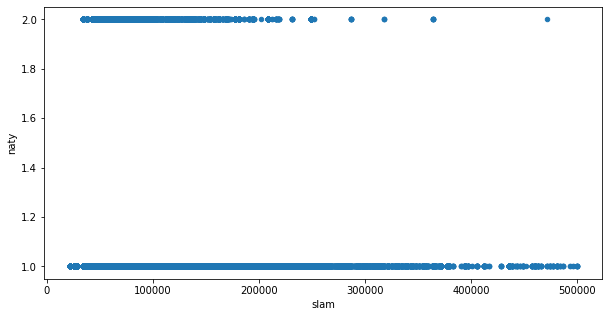

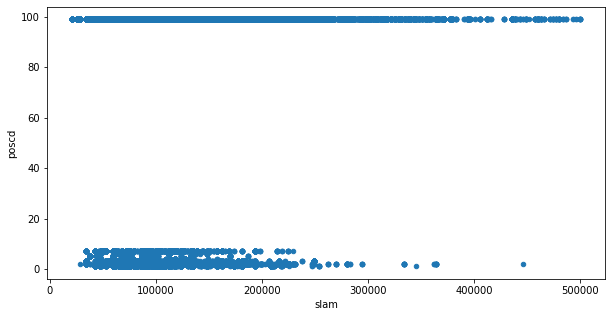

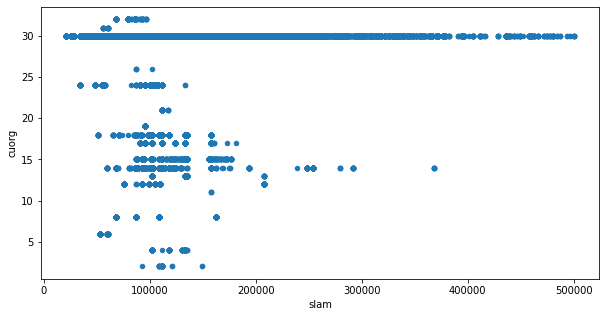

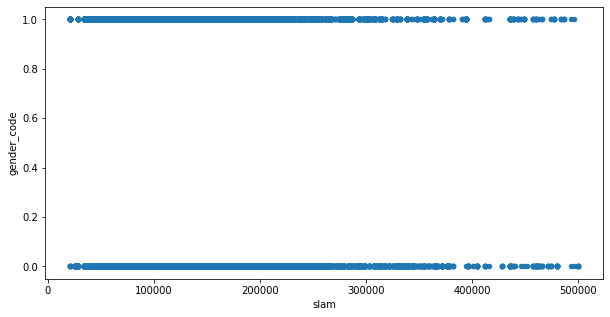

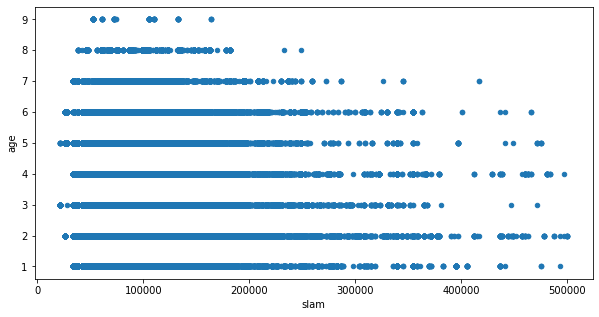

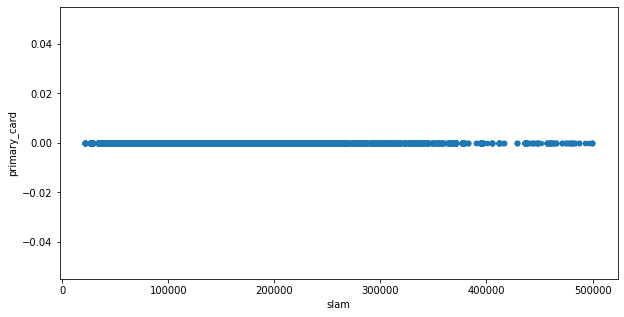

In [ ]:
col = dat.columns
df = dat[dat['slam']<5*10**5]
for i in col:
  if i != 'slam':
    df.plot.scatter(x='slam', y=i, figsize = (10,5))
    plt.show()

沒有什麼pattern或是特別的，就刪slam吧

In [ ]:
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  dat = df.drop(df.columns[0],axis = 1)
  del df
  display(dat.describe())
  del dat

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,961604.0,9.616040e+05,961604.000000,9.616040e+05,961604.000000,961604.000000,961604.000000,961604.000000,961604.00000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.0,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.0,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,961604.000000,9.073190e+05,947495.000000,947495.000000,961604.000000
mean,1.0,1.024999e+07,2.156420,2.579186e+49,1.536288,0.416742,0.035594,0.167796,0.75862,0.172537,0.017662,0.051182,0.364803,0.461551,0.080993,0.522566,0.081886,0.0,0.000020,0.111477,0.036207,0.117275,0.034692,0.037083,0.021329,0.011938,0.274600,0.138516,0.233251,0.038754,0.240502,0.039884,0.0,0.000008,0.052262,0.020164,0.056859,0.015426,0.018905,0.009101,0.005130,0.131239,1.480602,3.664057,10.620200,1.001885,36.512212,29.387263,1.390855e+212,0.452697,3.887552,0.912698
std,0.0,1.442684e+05,3.237853,2.529186e+52,2.037007,2.340834,0.392163,1.446890,0.42021,0.368893,0.128243,0.215491,2.315098,1.367231,0.671553,1.579575,0.665096,0.0,0.007965,0.764040,0.400195,0.807324,0.441713,0.389633,0.383692,0.275611,1.198692,0.343552,0.421973,0.191600,0.425348,0.195044,0.0,0.002729,0.220842,0.139825,0.230068,0.122226,0.135630,0.094084,0.070941,0.335245,0.500892,1.216018,4.548561,0.043380,45.907605,3.535745,inf,0.497758,1.158921,0.282277
min,1.0,1.000000e+07,-6.000000,2.237085e+01,-6.000000,-5.000000,-4.000000,-5.000000,0.00000,0.000000,0.000000,0.000000,-5.000000,-6.000000,-3.000000,-5.000000,-3.000000,0.0,0.000000,-3.000000,-1.000000,-5.000000,-1.000000,-3.000000,-1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.299146e+04,0.000000,1.000000,0.000000
25%,1.0,1.012528e+07,1.000000,5.773036e+03,1.000000,0.000000,0.000000,0.000000,0.72000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000,1.000000,2.000000,30.000000,5.970151e+04,0.000000,3.000000,1.000000
50%,1.0,1.024974e+07,1.000000,8.630883e+03,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,11.000000,1.000000,3.000000,30.000000,7.822147e+04,0.000000,4.000000,1.000000
75%,1.0,1.037475e+07,2.000000,1.268569e+04,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1004118.0,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1004118.0,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1004118.0,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,1.004118e+06,9.475800e+05,989581.000000,989581.000000,1.004118e+06
mean,2.0,1.025030e+07,2.129032e+00,7.132573e+43,1.514283e+00,4.204227e-01,3.480268e-02,1.595231e-01,7.629337e-01,1.706990e-01,1.697709e-02,4.939152e-02,4.143706e-01,4.403845e-01,7.854057e-02,4.998616e-01,8.039493e-02,0.0,1.693028e-05,1.066797e-01,3.456964e-02,1.119679e-01,3.352196e-02,3.299214e-02,2.093280e-02,1.132437e-02,2.634740e-01,1.581004e-01,2.265841e-01,3.824305e-02,2.358984e-01,3.941126e-02,0.0,4.700643e-06,5.115971e-02,1.976586e-02,5.547928e-02,1.508170e-02,1.792384e-02,9.087059e-03,5.039149e-03,1.282221e-01,1.480040e+00,3.660678e+00,1.039586e+01,1.001938e+00,3.630543e+01,2.938828e+01,5.313706e+179,0.452710,3.876718,9.133379e-01
std,0.0,1.441718e+05,3.118082e+00,7.147244e+46,2.023657e+00,2.194491e+00,3.881411e-01,1.408160e+00,4.172572e-01,3.670342e-01,1.258222e-01,2.119834e-01,2.188166e+00,1.327516e+00,6.694482e-01,1.532672e+00,6.563311e-01,0.0,6.389962e-03,7.435921e-01,4.331623e-01,7.550612e-01,4.259585e-01,3.612971e-01,3.673194e-01,2.562030e-01,1.171544e+00,3.629264e-01,4.177132e-01,1.904358e-01,4.224594e-01,1.939436e-01,0.0,2.032332e-03,2.185974e-01,1.384521e-01,2.274117e-01,1.208481e-01,1.320827e-01,9.394736e-02,7.034568e-02,3.319024e-01,5.008540e-01,1.215478e+00,4.649013e+00,4.398028e-02,4.583973e+01,3.533208e+00,inf,0.497759,1.153444,2.813394e-01
min,2.0,1.000000e+07,-6.300000e+01,2.237085e+01,-2.000000e+00,-6.300000e+01,-6.000000e+00,-8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,-6.300000e+01,-5.000000e+00,-4.000000e+00,-3.000000e+00,0.0,0.000000e+00,-1.000000e+00,-1.000000e+00,-7.000000e+00,-1.000000e+00,-3.000000e+00,-1.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.299146e+04,0.000000,1.000000,0.000000e+00
25%,2.0,1.012588e+07,1.000000e+00,5.773036e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00,1.000000e+00,2.0

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1070923.0,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1070923.0,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1070923.0,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.070912e+06,1.070923e+06,1.070923e+06,1.070923e+06,1.010735e+06,1.055578e+06,1.055578e+06,1.070923e+06
mean,3.0,1.025029e+07,2.184257e+00,6.196949e+108,1.534996e+00,4.550374e-01,3.351595e-02,1.607072e-01,7.571500e-01,1.772788e-01,1.614008e-02,4.943241e-02,4.960814e-01,4.354814e-01,7.959116e-02,4.950757e-01,7.960796e-02,0.0,1.213906e-05,1.021848e-01,3.337588e-02,1.095774e-01,3.381289e-02,3.185570e-02,1.982682e-02,1.133135e-02,2.564423e-01,1.878793e-01,2.230991e-01,3.793628e-02,2.254784e-01,3.800849e-02,0.0,5.023704e-06,4.752905e-02,1.888238e-02,5.282232e-02,1.487275e-02,1.712206e-02,8.458899e-03,4.968126e-03,1.229387e-01,1.486667e+00,3.644100e+00,1.034661e+01,1.001945e+00,3.589723e+01,2.939859e+01,1.240201e+113,4.528590e-01,3.853833e+00,9.139014e-01
std,0.0,1.441271e+05,3.653218e+00,6.412938e+111,2.629513e+00,2.370581e+00,3.854613e-01,1.404015e+00,4.203463e-01,3.721889e-01,1.227380e-01,2.118687e-01,2.439165e+00,1.340363e+00,6.815881e-01,1.728517e+00,9.386264e-01,0.0,4.831586e-03,7.495442e-01,4.215705e-01,7.588477e-01,4.434437e-01,3.613576e-01,3.694833e-01,2.602570e-01,1.191386e+00,3.885238e-01,4.153515e-01,1.896580e-01,4.157611e-01,1.905698e-01,0.0,2.063172e-03,2.110809e-01,1.353953e-01,2.221311e-01,1.199036e-01,1.291368e-01,9.066164e-02,6.982707e-02,3.258512e-01,5.010073e-01,1.218787e+00,4.645751e+00,4.405984e-02,4.571988e+01,3.508552e+00,1.246840e+116,4.977730e-01,1.154524e+00,2.805098e-01
min,3.0,1.000000e+07,-8.000000e+00,2.237085e+01,-3.000000e+00,-8.000000e+00,-4.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.000000e+00,-8.000000e+00,-2.000000e+00,-8.000000e+00,-4.000000e+00,0.0,0.000000e+00,-5.000000e+00,-2.000000e+00,-5.000000e+00,-1.000000e+00,-2.000000e+00,-4.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.299146e+04,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.0,1.012588e+07,1.000000e+00,5.773036e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1069551.0,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1069551.0,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1069551.0,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.069539e+06,1.069551e+06,1.069551e+06,1.069551e+06,1.009664e+06,1.054515e+06,1.054515e+06,1.069551e+06
mean,4.0,1.025031e+07,2.245393e+00,2.318875e+49,1.526376e+00,5.083825e-01,4.333407e-02,1.673001e-01,7.373313e-01,1.893539e-01,2.032682e-02,5.298925e-02,5.794936e-01,4.275934e-01,7.611418e-02,4.949161e-01,7.591410e-02,0.0,5.609831e-06,1.001906e-01,3.235002e-02,1.062717e-01,3.495766e-02,3.088679e-02,2.194192e-02,1.169182e-02,2.530651e-01,2.094038e-01,2.129219e-01,3.596397e-02,2.230841e-01,3.697911e-02,0.0,3.347199e-06,4.623913e-02,1.808073e-02,5.142248e-02,1.503113e-02,1.670005e-02,9.128924e-03,5.125319e-03,1.199166e-01,1.487175e+00,3.647906e+00,1.032734e+01,1.001920e+00,3.579107e+01,2.940701e+01,5.039923e+149,4.525218e-01,3.827271e+00,9.127914e-01
std,0.0,1.442365e+05,3.500766e+00,2.398160e+52,2.098378e+00,2.709322e+00,4.349118e-01,1.349547e+00,4.304963e-01,3.810958e-01,1.373134e-01,2.185019e-01,2.791657e+00,1.329010e+00,6.377521e-01,1.559787e+00,6.536086e-01,0.0,2.734913e-03,7.389690e-01,3.822565e-01,7.466791e-01,4.436515e-01,3.320712e-01,3.840554e-01,2.510746e-01,1.140654e+00,4.048301e-01,4.083680e-01,1.847968e-01,4.141529e-01,1.880778e-01,0.0,1.728900e-03,2.083188e-01,1.325086e-01,2.193696e-01,1.205864e-01,1.275267e-01,9.409013e-02,7.092588e-02,3.223885e-01,5.009587e-01,1.221578e+00,4.678528e+00,4.378066e-02,4.568794e+01,3.482711e+00,inf,4.977409e-01,1.151321e+00,2.821406e-01
min,4.0,1.000000e+07,-1.000000e+01,2.237085e+01,-1.000000e+01,-5.000000e+00,-3.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,-1.000000e+01,-3.000000e+00,-4.000000e+00,-4.000000e+00,0.0,0.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-1.000000e+00,-1.000000e+00,-3.000000e+00,-1.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.299146e+04,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.0,1.012576e+07,1.000000e+00,5.773036e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,6.0000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1154916.0,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.154913e+06,1.154916e+06,1.154916e+06,1.154916e+06,1.090035e+06,1.138776e+06,1.138776e+06,1.154916e+06
mean,5.0,1.025055e+07,2.314083e+00,2.295738e+39,1.549947e+00,5.498426e-01,4.706057e-02,1.672321e-01,7.300574e-01,1.962928e-01,2.067017e-02,5.298145e-02,6.320953e-01,4.368093e-01,7.788965e-02,4.933926e-01,7.657527e-02,6.896605e-03,1.385382e-05,9.780019e-02,3.276169e-02,1.049903e-01,3.679315e-02,3.085506e-02,2.262762e-02,1.151945e-02,2.530626e-01,2.203680e-01,2.138996e-01,3.592788e-02,2.176652e-01,3.602639e-02,1.433602e-03,2.459053e-06,4.419991e-02,1.790310e-02,4.963834e-02,1.515424e-02,1.618871e-02,8.921290e-03,4.944065e-03,1.177280e-01,1.483375e+00,3.639284e+00,1.037491e+01,1.001901e+00,3.567378e+01,2.941455e+01,3.501238e+149,4.502360e-01,3.826091e+00,9.125053e-01
std,0.0,1.441757e+05,3.625098e+00,2.467161e+42,2.205637e+00,2.760441e+00,5.014374e-01,1.397696e+00,4.337679e-01,3.859228e-01,1.385933e-01,2.185617e-01,2.899184e+00,1.369160e+00,6.567149e-01,1.598097e+00,6.760854e-01,2.000421e-01,6.579744e-03,7.485224e-01,3.878414e-01,7.586233e-01,4.751092e-01,3.455940e-01,4.034263e-01,2.520739e-01,1.176195e+00,4.122016e-01,4.090369e-01,1.846896e-01,4.104394e-01,1.857322e-01,3.515916e-02,1.342527e-03,2.038419e-01,1.318437e-01,2.156823e-01,1.209726e-01,1.255120e-01,9.304780e-02,6.966949e-02,3.197828e-01,5.009334e-01,1.223422e+00,4.686367e+00,4.355411e-02,4.565489e+01,3.453722e+00,inf,4.975176e-01,1.147177e+00,2.825587e-01
min,5.0,1.000000e+07,-2.600000e+01,2.237085e+01,-6.000000e+00,-2.600000e+01,-2.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.100000e+01,-8.000000e+00,-2.600000e+01,-3.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-1.000000e+00,-3.000000e+00,-4.000000e+00,-2.200000e+01,-2.000000e+00,-1.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.299146e+04,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.0,1.012599e+07,1.000000e+00,5.773036e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1196319.0,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.196312e+06,1.196319e+06,1.196319e+06,1.196319e+06,1.130065e+06,1.179923e+06,1.179923e+06,1.196319e+06
mean,6.0,1.025043e+07,2.379900e+00,3.843341e+51,1.512031e+00,6.534235e-01,4.113201e-02,1.733125e-01,7.085174e-01,2.195928e-01,1.841276e-02,5.347839e-02,6.267375e-01,4.134758e-01,7.472422e-02,4.847712e-01,7.134803e-02,1.516326e-01,1.671795e-06,9.212509e-02,3.009565e-02,9.921518e-02,3.880403e-02,2.869051e-02,1.961601e-02,1.127709e-02,2.373848e-01,2.221612e-01,2.008746e-01,3.419646e-02,2.105846e-01,3.416471e-02,3.964212e-02,8.442564e-07,4.137154e-02,1.661488e-02,4.691433e-02,1.577747e-02,1.521714e-02,7.788474e-03,4.721115e-03,1.099718e-01,1.493618e+00,3.628929e+00,1.035400e+01,1.001930e+00,3.519721e+01,2.943008e+01,7.880167e+149,4.514100e-01,3.784449e+00,9.139485e-01
std,0.0,1.442402e+05,3.521034e+00,4.203707e+54,2.213577e+00,2.651512e+00,4.551261e-01,1.420917e+00,4.437920e-01,4.022165e-01,1.306236e-01,2.192203e-01,2.489492e+00,1.352834e+00,6.514809e-01,1.614851e+00,6.396089e-01,1.276067e+00,1.292979e-03,7.828539e-01,3.754881e-01,7.423690e-01,4.933396e-01,3.358242e-01,3.853846e-01,2.775676e-01,1.157441e+00,4.120393e-01,3.995150e-01,1.803344e-01,4.054558e-01,1.809597e-01,1.900499e-01,9.143200e-04,1.974200e-01,1.271124e-01,2.099378e-01,1.233455e-01,1.218003e-01,8.687634e-02,6.799047e-02,3.101448e-01,5.010584e-01,1.224863e+00,4.715077e+00,4.389036e-02,4.549789e+01,3.415729e+00,inf,4.976336e-01,1.152449e+00,2.804401e-01
min,6.0,1.000000e+07,-2.100000e+01,2.237085e+01,-4.000000e+00,-6.000000e+00,-2.000000e+00,-2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,-4.000000e+00,-2.000000e+00,-2.100000e+01,-3.000000e+00,-2.000000e+00,0.000000e+00,-1.000000e+00,-2.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-4.000000e+00,-2.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.0,1.012579e+07,1.000000e+00,5.773036e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1216290.0,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.216286e+06,1.216290e+06,1.216290e+06,1.216290e+06,1.149455e+06,1.200003e+06,1.200003e+06,1.216290e+06
mean,7.0,1.025043e+07,2.410756e+00,9.886189e+60,1.426841e+00,7.601879e-01,3.578998e-02,1.879379e-01,6.781925e-01,2.475263e-01,1.653826e-02,5.774447e-02,6.122232e-01,3.732218e-01,7.043468e-02,4.390927e-01,6.654745e-02,3.117012e-01,1.302732e-02,8.474706e-02,2.778696e-02,9.105230e-02,3.979725e-02,3.124913e-02,1.832129e-02,1.078032e-02,2.207738e-01,2.221999e-01,1.836300e-01,3.285954e-02,1.962340e-01,3.249241e-02,8.173113e-02,5.683488e-03,3.907271e-02,1.538465e-02,4.381976e-02,1.584940e-02,1.527953e-02,7.395818e-03,4.624292e-03,1.037445e-01,1.511570e+00,3.616384e+00,1.028851e+01,1.001870e+00,3.463634e+01,2.943814e+01,7.747238e+149,4.538539e-01,3.731907e+00,9.148468e-01
std,0.0,1.442417e+05,3.671974e+00,1.090304e+64,2.094704e+00,2.974177e+00,3.944350e-01,1.437966e+00,4.562659e-01,4.194706e-01,1.238813e-01,2.271332e-01,2.565886e+00,1.266067e+00,6.119524e-01,1.520568e+00,6.139521e-01,1.855000e+00,2.532487e-01,6.690602e-01,3.396793e-01,6.925257e-01,4.953996e-01,3.857956e-01,3.732850e-01,2.522469e-01,1.077622e+00,4.117089e-01,3.860631e-01,1.768665e-01,3.949699e-01,1.766514e-01,2.691149e-01,7.327131e-02,1.921185e-01,1.224228e-01,2.033161e-01,1.236074e-01,1.220644e-01,8.472659e-02,6.733761e-02,3.024109e-01,5.009556e-01,1.226980e+00,4.752921e+00,4.319868e-02,4.530781e+01,3.409259e+00,inf,4.978662e-01,1.158740e+00,2.791097e-01
min,7.0,1.000000e+07,-1.400000e+01,2.237085e+01,-6.000000e+00,-6.000000e+00,-7.000000e+00,-1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,-3.000000e+00,-4.000000e+00,-1.400000e+01,-3.000000e+00,-1.100000e+01,0.000000e+00,-1.000000e+00,-3.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-7.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.299146e+04,0.000000e+00,1.000000e+00,0.000000e+00
25%,7.0,1.012578e+07,1.000000e+00,5.773036e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1302411.0,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.302403e+06,1.302411e+06,1.302411e+06,1.302411e+06,1.231523e+06,1.285262e+06,1.285262e+06,1.302411e+06
mean,8.0,1.025033e+07,2.527566e+00,6.956831e+10,1.430423e+00,8.688947e-01,3.867366e-02,1.895746e-01,6.649531e-01,2.609476e-01,1.740212e-02,5.669874e-02,6.272344e-01,3.669364e-01,6.792479e-02,4.176155e-01,6.860661e-02,4.043363e-01,3.952439e-02,8.152572e-02,2.649548e-02,8.813654e-02,4.035669e-02,2.661525e-02,1.690557e-02,1.046137e-02,2.448912e-01,2.215525e-01,1.772047e-01,3.083734e-02,1.837511e-01,3.163212e-02,9.948013e-02,1.458167e-02,3.662108e-02,1.439772e-02,4.129919e-02,1.530408e-02,1.362783e-02,6.785431e-03,4.273321e-03,1.086530e-01,1.517469e+00,3.609533e+00,1.028279e+01,1.001935e+00,3.420767e+01,2.945933e+01,1.037186e+138,4.497091e-01,3.709830e+00,9.163037e-01
std,0.0,1.442693e+05,4.057327e+00,5.329021e+13,2.181416e+00,3.388087e+00,4.200603e-01,1.463760e+00,4.607994e-01,4.263778e-01,1.267553e-01,2.250657e-01,2.785002e+00,1.314958e+00,6.247881e-01,1.545052e+00,6.631555e-01,2.228819e+00,5.330389e-01,6.838009e-01,3.454496e-01,7.075051e-01,5.160531e-01,3.331365e-01,3.443857e-01,2.487682e-01,1.146860e+00,4.111695e-01,3.806947e-01,1.714444e-01,3.851026e-01,1.743655e-01,2.945073e-01,1.180087e-01,1.862142e-01,1.184488e-01,1.975795e-01,1.214864e-01,1.153229e-01,8.108305e-02,6.467422e-02,3.084958e-01,5.008368e-01,1.226840e+00,4.771060e+00,4.394463e-02,4.515792e+01,3.346222e+00,4.350387e+140,4.974646e-01,1.160510e+00,2.769319e-01
min,8.0,1.000000e+07,-1.200000e+01,2.237085e+01,-3.000000e+00,-1.200000e+01,-9.000000e+00,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+00,-3.000000e+00,-4.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-3.000000e+00,-2.000000e+00,-3.000000e+00,-3.000000e+00,-1.000000e+00,-1.000000e+00,-9.000000e+00,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.0,1.012565e+07,1.000000e+00,5.773036e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1347673.0,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.347667e+06,1.347673e+06,1.347673e+06,1.347673e+06,1.274395e+06,1.330022e+06,1.330022e+06,1.347673e+06
mean,9.0,1.025040e+07,2.526318e+00,2.121335e+49,1.361097e+00,9.298086e-01,3.359198e-02,2.018197e-01,6.418434e-01,2.834940e-01,1.543521e-02,5.922895e-02,6.249394e-01,3.576825e-01,6.541201e-02,3.971713e-01,6.393836e-02,4.555319e-01,5.269824e-02,7.682798e-02,2.623262e-02,8.364344e-02,3.936563e-02,2.402586e-02,1.570336e-02,1.017235e-02,2.329727e-01,2.244342e-01,1.710860e-01,2.993783e-02,1.759519e-01,3.019531e-02,1.167212e-01,1.951681e-02,3.447408e-02,1.400980e-02,3.895622e-02,1.495985e-02,1.256859e-02,6.439752e-03,4.251640e-03,1.064975e-01,1.521403e+00,3.600218e+00,1.026901e+01,1.001973e+00,3.372430e+01,2.946986e+01,1.026899e+126,4.491918e-01,3.687031e+00,9.165042e-01
std,0.0,1.442992e+05,4.584889e+00,2.462644e+52,2.106156e+00,4.064103e+00,3.875028e-01,1.486643e+00,4.687935e-01,4.379733e-01,1.194110e-01,2.290631e-01,3.548913e+00,1.320982e+00,6.122577e-01,1.474110e+00,6.062185e-01,2.262220e+00,6.055503e-01,6.798957e-01,3.500528e-01,6.906013e-01,4.944662e-01,3.114826e-01,3.221367e-01,2.420099e-01,1.116287e+00,4.130789e-01,3.754328e-01,1.690513e-01,3.786563e-01,1.704436e-01,3.163347e-01,1.366115e-01,1.808958e-01,1.168792e-01,1.921705e-01,1.201926e-01,1.108378e-01,7.907687e-02,6.451281e-02,3.059070e-01,5.006028e-01,1.226395e+00,4.790935e+00,4.437498e-02,4.498562e+01,3.309224e+00,5.184346e+128,4.974120e-01,1.158638e+00,2.766302e-01
min,9.0,1.000000e+07,-1.200000e+01,2.237085e+01,-3.000000e+00,-1.200000e+01,-4.000000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+00,-6.000000e+00,-3.000000e+00,-1.000000e+01,-2.000000e+00,-1.200000e+01,-2.000000e+00,-3.000000e+00,-2.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-4.000000e+00,-1.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,9.0,1.012564e+07,1.000000e+00,5.773036e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1407966.0,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.407959e+06,1.407966e+06,1.407966e+06,1.407966e+06,1.332027e+06,1.389945e+06,1.389945e+06,1.407966e+06
mean,10.0,1.025026e+07,2.580280e+00,1.821959e+49,1.391761e+00,9.480882e-01,3.192052e-02,2.085100e-01,6.427904e-01,2.843751e-01,1.426464e-02,5.857187e-02,6.367711e-01,3.442746e-01,6.449090e-02,4.084204e-01,6.939230e-02,4.861651e-01,6.288291e-02,7.585908e-02,2.539692e-02,8.224062e-02,3.988804e-02,2.702835e-02,1.528517e-02,1.010181e-02,2.320823e-01,2.270987e-01,1.614585e-01,2.879148e-02,1.755641e-01,3.149364e-02,1.248516e-01,2.271256e-02,3.366466e-02,1.345214e-02,3.797722e-02,1.459231e-02,1.332240e-02,6.206300e-03,4.124127e-03,1.046913e-01,1.526158e+00,3.601413e+00,1.026425e+01,1.002059e+00,3.376803e+01,2.947676e+01,2.536597e+114,4.479134e-01,3.660097e+00,9.159639e-01
std,0.0,1.443353e+05,4.551822e+00,2.161895e+52,2.121315e+00,3.999017e+00,3.759168e-01,1.566944e+00,4.681765e-01,4.379651e-01,1.145299e-01,2.276217e-01,3.412903e+00,1.296429e+00,6.207141e-01,1.519295e+00,6.433492e-01,2.359261e+00,7.062741e-01,6.867213e-01,3.453321e-01,6.910774e-01,5.056933e-01,3.468309e-01,3.251832e-01,2.441814e-01,1.136538e+00,4.148531e-01,3.667825e-01,1.658652e-01,3.782997e-01,1.739549e-01,3.259060e-01,1.472412e-01,1.788517e-01,1.145463e-01,1.898098e-01,1.187577e-01,1.140551e-01,7.766449e-02,6.353661e-02,3.036799e-01,5.003783e-01,1.228579e+00,4.810733e+00,4.532947e-02,4.500067e+01,3.292688e+00,9.758555e+116,4.972798e-01,1.159082e+00,2.774421e-01
min,10.0,1.000000e+07,-2.500000e+01,2.237085e+01,-6.000000e+00,-2.500000e+01,-3.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+00,-1.600000e+01,-4.000000e+00,-4.000000e+00,-3.000000e+00,-2.600000e+01,-1.300000e+01,-3.000000e+00,-2.000000e+00,-1.100000e+01,-8.000000e+00,-1.000000e+00,-4.000000e+00,-1.000000e+00,-1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,10.0,1.012539e+07,1.000000e+00,5.773036e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1457278.0,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.457269e+06,1.457266e+06,1.457278e+06,1.457278e+06,1.457278e+06,1.379872e+06,1.439031e+06,1.439031e+06,1.457278e+06
mean,11.0,1.025018e+07,2.526161e+00,1.738521e+40,1.395373e+00,8.971061e-01,3.801471e-02,1.956675e-01,6.536745e-01,2.723317e-01,1.625288e-02,5.774215e-02,6.151688e-01,3.513894e-01,6.264831e-02,4.060769e-01,5.988356e-02,4.892251e-01,7.010811e-02,7.128633e-02,2.346155e-02,7.620166e-02,3.654622e-02,2.390759e-02,1.536289e-02,9.708511e-03,2.151861e-01,2.261879e-01,1.695321e-01,2.886488e-02,1.753078e-01,2.798705e-02,1.294278e-01,2.579209e-02,3.246605e-02,1.297258e-02,3.595102e-02,1.387444e-02,1.228907e-02,6.076987e-03,4.100233e-03,9.917074e-02,1.520255e+00,3.592250e+00,1.026898e+01,1.002009e+00,3.355047e+01,2.948872e+01,1.784674e+105,4.513454e-01,3.669578e+00,9.173713e-01
std,0.0,1.444084e+05,4.161123e+00,2.098703e+43,2.069042e+00,3.593461e+00,4.241785e-01,1.484864e+00,4.646446e-01,4.321608e-01,1.221030e-01,2.264350e-01,3.019778e+00,1.251091e+00,5.850058e-01,1.474817e+00,5.825848e-01,2.279862e+00,7.479734e-01,6.432586e-01,3.169865e-01,6.507025e-01,4.714950e-01,3.154057e-01,3.240179e-01,2.257612e-01,1.055703e+00,4.141799e-01,3.738561e-01,1.659662e-01,3.780077e-01,1.642782e-01,3.310489e-01,1.567282e-01,1.756310e-01,1.124870e-01,1.848871e-01,1.157859e-01,1.095865e-01,7.679152e-02,6.326204e-02,2.964853e-01,5.006092e-01,1.228998e+00,4.808844e+00,4.477171e-02,4.492544e+01,3.248182e+00,1.047293e+108,4.976273e-01,1.156317e+00,2.753203e-01
min,11.0,1.000000e+07,-1.300000e+01,2.237085e+01,-4.000000e+00,-1.300000e+01,-3.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,-1.000000e+01,-3.000000e+00,-5.000000e+00,-3.000000e+00,-7.000000e+00,-5.000000e+00,-1.000000e+00,-1.300000e+01,-4.000000e+00,-2.000000e+00,-1.000000e+00,-5.000000e+00,-1.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,11.0,1.012522e+07,1.000000e+00,5.773036e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1332438.0,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.332434e+06,1.332428e+06,1.332438e+06,1.332438e+06,1.332438e+06,1.262374e+06,1.315753e+06,1.315753e+06,1.332438e+06
mean,12.0,1.025036e+07,2.531138e+00,2.360600e+10,1.316843e+00,9.821117e-01,3.046070e-02,2.017220e-01,6.282223e-01,2.994989e-01,1.327513e-02,5.900525e-02,6.248516e-01,3.394995e-01,5.945417e-02,3.867129e-01,5.877947e-02,5.424823e-01,6.849775e-02,6.928352e-02,2.309976e-02,7.456257e-02,3.517987e-02,2.167756e-02,1.347380e-02,9.744543e-03,2.038384e-01,2.319378e-01,1.641427e-01,2.711420e-02,1.698814e-01,2.776588e-02,1.447818e-01,2.515606e-02,3.161701e-02,1.238948e-02,3.520581e-02,1.364421e-02,1.146903e-02,5.465140e-03,4.003031e-03,9.542725e-02,1.532332e+00,3.585922e+00,1.027325e+01,1.001997e+00,3.316668e+01,2.950112e+01,4.872700e+104,4.516516e-01,3.626004e+00,9.183812e-01
std,0.0,1.443434e+05,4.644248e+00,2.718612e+13,2.088076e+00,4.142765e+00,3.755667e-01,1.515925e+00,4.729249e-01,4.457592e-01,1.107382e-01,2.290230e-01,3.608935e+00,1.254252e+00,5.886104e-01,1.454515e+00,5.766887e-01,2.392340e+00,7.129598e-01,6.374572e-01,3.499190e-01,6.418256e-01,4.569341e-01,3.079654e-01,3.071421e-01,2.341163e-01,1.048908e+00,4.180606e-01,3.691178e-01,1.610211e-01,3.734680e-01,1.636776e-01,3.474493e-01,1.549460e-01,1.735392e-01,1.100349e-01,1.831363e-01,1.149060e-01,1.059427e-01,7.296212e-02,6.255529e-02,2.916744e-01,5.001076e-01,1.225904e+00,4.812704e+00,4.464420e-02,4.477759e+01,3.214339e+00,5.474743e+107,4.976571e-01,1.151054e+00,2.737832e-01
min,12.0,1.000000e+07,-1.100000e+01,2.237085e+01,-3.000000e+00,-1.100000e+01,-3.000000e+00,-1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.100000e+01,-9.000000e+00,-1.000000e+00,-7.000000e+00,-5.000000e+00,-1.100000e+01,-2.000000e+00,-2.000000e+00,-2.000000e+00,-7.000000e+00,-1.000000e+00,-1.000000e+00,-3.000000e+00,-1.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,12.0,1.012564e+07,1.000000e+00,5.767360e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1353522.0,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353522e+06,1.353521e+06,1.353521e+06,1.353510e+06,1.353521e+06,1.353521e+06,1.353521e+06,1.283217e+06,1.336771e+06,1.336771e+06,1.353522e+06
mean,13.0,1.025013e+07,2.764596e+00,9.641481e+03,1.364977e+00,1.171725e+00,1.171906e-02,2.161745e-01,6.111539e-01,3.262269e-01,4.753199e-03,5.786783e-02,6.851030e-01,3.444938e-01,6.177956e-02,4.134613e-01,6.633435e-02,6.525258e-01,7.004097e-02,7.220274e-02,2.366714e-02,7.880773e-02,3.669168e-02,2.487289e-02,1.037589e-02,1.044239e-02,2.137970e-01,2.341323e-01,1.554727e-01,2.582955e-02,1.683885e-01,2.910955e-02,1.575532e-01,2.374151e-02,3.130612e-02,1.208730e-02,3.480025e-02,1.316608e-02,1.198598e-02,4.189633e-03,3.963807e-03,9.427385e-02,1.541273e+00,3.596489e+00,1.024247e+01,1.002014e+00,3.301515e+01,2.951377e+01,4.793554e+104,4.494121e-01,3.599465e+00,9.188709e-01
std,0.0,1.444406e+05,5.425652e+00,6.990091e+03,2.228796e+00,4.918356e+00,2.372496e-01,1.729649e+00,4.769497e-01,4.559818e-01,6.614012e-02,2.263257e-01,4.203414e+00,1.389031e+00,6.537929e-01,1.624645e+00,6.614801e-01,2.839307e+00,8.094292e-01,6.654936e-01,3.581065e-01,7.014321e-01,5.386685e-01,3.536479e-01,2.770853e-01,2.615531e-01,1.152556e+00,4.193515e-01,3.610653e-01,1.572408e-01,3.720391e-01,1.674944e-01,3.598598e-01,1.505950e-01,1.726784e-01,1.086762e-01,1.820584e-01,1.128716e-01,1.083080e-01,6.402111e-02,6.224652e-02,2.900275e-01,4.994933e-01,1.225715e+00,4.825798e+00,4.483248e-02,4.471282e+01,3.177252e+00,5.430098e+107,4.974345e-01,1.155425e+00,2.730334e-01
min,13.0,1.000000e+07,-9.000000e+00,2.237085e+01,-2.000000e+00,-8.000000e+00,-2.000000e+00,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+00,-2.000000e+00,-2.000000e+00,-7.000000e+00,-2.000000e+00,-8.000000e+00,-2.000000e+00,0.000000e+00,-2.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,13.0,1.012525e+07,1.000000e+00,5.587804e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1385513.0,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.385492e+06,1.385513e+06,1.385513e+06,1.385513e+06,1.314078e+06,1.368738e+06,1.368738e+06,1.385513e+06
mean,14.0,1.025037e+07,2.684757e+00,9.509165e+03,1.275499e+00,1.193775e+00,6.550642e-03,2.089320e-01,5.917013e-01,3.479662e-01,2.769429e-03,5.756518e-02,6.666520e-01,3.288551e-01,5.991788e-02,3.933576e-01,6.444039e-02,6.524681e-01,6.721193e-02,6.970126e-02,2.328379e-02,7.549839e-02,3.444789e-02,2.295540e-02,8.538354e-03,1.019334e-02,2.072359e-01,2.349994e-01,1.533640e-01,2.588978e-02,1.662241e-01,2.882484e-02,1.651178e-01,2.366869e-02,3.073342e-02,1.219203e-02,3.401263e-02,1.288465e-02,1.147303e-02,3.536293e-03,4.019349e-03,9.306114e-02,1.539397e+00,3.592991e+00,1.021512e+01,1.001929e+00,3.275910e+01,2.951263e+01,4.680978e+104,4.502754e-01,3.599714e+00,9.202577e-01
std,0.0,1.444216e+05,4.212945e+00,7.036661e+03,2.095295e+00,3.642730e+00,1.478202e-01,1.622806e+00,4.814624e-01,4.639470e-01,4.991451e-02,2.255114e-01,2.660960e+00,1.325140e+00,6.172781e-01,1.533111e+00,6.653383e-01,2.737487e+00,7.340831e-01,6.678855e-01,3.654289e-01,6.853106e-01,4.775759e-01,3.392814e-01,2.446221e-01,2.561157e-01,1.108489e+00,4.200670e-01,3.591391e-01,1.574554e-01,3.702216e-01,1.667309e-01,3.670475e-01,1.504212e-01,1.712110e-01,1.091888e-01,1.800944e-01,1.117210e-01,1.059754e-01,5.879915e-02,6.267042e-02,2.884608e-01,4.996720e-01,1.224137e+00,4.838335e+00,4.387265e-02,4.461206e+01,3.181857e+00,5.365957e+107,4.975215e-01,1.152627e+00,2.708939e-01
min,14.0,1.000000e+07,-8.000000e+00,2.237085e+01,-2.000000e+00,-8.000000e+00,-2.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+00,-5.000000e+00,-2.000000e+00,-2.000000e+00,-3.000000e+00,-6.000000e+00,-8.000000e+00,0.000000e+00,-2.000000e+00,-4.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,14.0,1.012545e+07,1.000000e+00,5.198984e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1501172.0,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.501146e+06,1.501172e+06,1.501172e+06,1.501172e+06,1.423624e+06,1.483050e+06,1.483050e+06,1.501172e+06
mean,15.0,1.025021e+07,2.739093e+00,9.832698e+03,1.346439e+00,1.159579e+00,6.708758e-03,2.263658e-01,6.127304e-01,3.259736e-01,2.752063e-03,5.854606e-02,6.882536e-01,3.391317e-01,6.330387e-02,3.866712e-01,6.287820e-02,6.711263e-01,7.066012e-02,6.878093e-02,2.268561e-02,7.481355e-02,3.513788e-02,2.342103e-02,8.765151e-03,1.071496e-02,2.127484e-01,2.384129e-01,1.557446e-01,2.652110e-02,1.626444e-01,2.754584e-02,1.668511e-01,2.433666e-02,2.933409e-02,1.161381e-02,3.299974e-02,1.250818e-02,1.151278e-02,3.471288e-03,4.174678e-03,9.232948e-02,1.538630e+00,3.586387e+00,1.021882e+01,1.001947e+00,3.272196e+01,2.951615e+01,4.320783e+104,4.485311e-01,3.597287e+00,9.199026e-01
std,0.0,1.443991e+05,4.093825e+00,7.216955e+03,2.175117e+00,3.425164e+00,1.552315e-01,1.700328e+00,4.761275e-01,4.552434e-01,4.971609e-02,2.269000e-01,2.363685e+00,1.339713e+00,6.363228e-01,1.542394e+00,6.640770e-01,2.834275e+00,7.559060e-01,6.598355e-01,3.496239e-01,6.851395e-01,5.100104e-01,3.415445e-01,2.603246e-01,2.631116e-01,1.128074e+00,4.220787e-01,3.613321e-01,1.592608e-01,3.668958e-01,1.630166e-01,3.684694e-01,1.524856e-01,1.673379e-01,1.065404e-01,1.774708e-01,1.100454e-01,1.061231e-01,5.823990e-02,6.386635e-02,2.873119e-01,4.997442e-01,1.225463e+00,4.839135e+00,4.408350e-02,4.460480e+01,3.173715e+00,5.155373e+107,4.973441e-01,1.155652e+00,2.714440e-01
min,15.0,1.000000e+07,-8.000000e+00,2.237085e+01,-4.000000e+00,-6.000000e+00,-1.000000e+00,-8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,-5.000000e+00,-1.000000e+00,-8.000000e+00,0.000000e+00,-6.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-2.000000e+00,0.000000e+00,-1.000000e+00,-5.000000e+00,0.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,15.0,1.012530e+07,1.000000e+00,5.652333e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1533051.0,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.533021e+06,1.533051e+06,1.533051e+06,1.533051e+06,1.453441e+06,1.514666e+06,1.514666e+06,1.533051e+06
mean,16.0,1.025018e+07,2.734850e+00,9.962957e+03,1.331138e+00,1.181666e+00,7.063692e-03,2.149818e-01,6.110896e-01,3.268250e-01,2.894940e-03,5.919224e-02,6.965815e-01,3.285351e-01,6.277417e-02,3.753600e-01,6.322425e-02,6.890260e-01,7.103482e-02,6.679752e-02,2.247283e-02,7.242225e-02,3.407584e-02,2.286421e-02,8.740740e-03,1.087505e-02,2.100654e-01,2.419113e-01,1.533832e-01,2.693087e-02,1.593279e-01,2.770321e-02,1.702562e-01,2.482323e-02,2.907385e-02,1.152335e-02,3.220905e-02,1.219024e-02,1.132076e-02,3.533718e-03,4.294189e-03,9.151970e-02,1.541262e+00,3.583414e+00,1.022277e+01,1.002055e+00,3.259688e+01,2.951630e+01,1.451320e+127,4.474637e-01,3.587431e+00,9.190020e-01
std,0.0,1.443607e+05,4.185350e+00,8.013498e+03,2.168393e+00,3.582751e+00,1.682981e-01,1.637695e+00,4.764117e-01,4.555097e-01,5.107684e-02,2.284412e-01,2.491160e+00,1.321293e+00,6.346819e-01,1.508855e+00,6.643576e-01,2.897094e+00,7.532136e-01,6.414235e-01,3.428554e-01,6.673066e-01,5.076563e-01,3.330942e-01,2.574798e-01,2.728279e-01,1.141761e+00,4.242197e-01,3.591022e-01,1.604787e-01,3.638504e-01,1.634898e-01,3.715130e-01,1.540151e-01,1.665782e-01,1.061501e-01,1.753736e-01,1.086649e-01,1.052262e-01,5.876159e-02,6.479360e-02,2.861349e-01,4.994806e-01,1.228563e+00,4.840249e+00,4.528968e-02,4.455549e+01,3.171082e+00,1.010185e+130,4.972324e-01,1.157465e+00,2.728321e-01
min,16.0,1.000000e+07,-2.200000e+01,2.237085e+01,-4.000000e+00,-6.000000e+00,0.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,-3.000000e+00,-3.000000e+00,-1.000000e+01,-2.000000e+00,-6.000000e+00,-2.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-3.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,16.0,1.012537e+07,1.000000e+00,5.658154e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1584620.0,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.584593e+06,1.584620e+06,1.584620e+06,1.584620e+06,1.501564e+06,1.565311e+06,1.565311e+06,1.584620e+06
mean,17.0,1.025021e+07,2.783926e+00,9.783312e+03,1.370516e+00,1.189784e+00,7.209299e-03,2.164172e-01,6.155061e-01,3.216417e-01,2.948549e-03,5.990531e-02,7.379163e-01,3.400910e-01,6.576719e-02,3.855726e-01,6.321831e-02,6.595070e-01,7.089523e-02,6.847825e-02,2.276003e-02,7.416226e-02,3.447325e-02,2.316265e-02,9.207255e-03,1.142545e-02,2.172893e-01,2.486985e-01,1.546828e-01,2.721135e-02,1.610297e-01,2.724385e-02,1.603418e-01,2.398410e-02,2.874458e-02,1.143309e-02,3.237158e-02,1.209041e-02,1.143787e-02,3.575393e-03,4.315470e-03,9.284031e-02,1.534632e+00,3.588665e+00,1.025139e+01,1.002118e+00,3.280954e+01,2.951654e+01,4.096509e+104,4.435668e-01,3.593072e+00,9.170312e-01
std,0.0,1.443933e+05,4.345058e+00,6.990363e+03,2.248566e+00,3.718290e+00,1.756383e-01,1.619717e+00,4.747177e-01,4.530277e-01,5.164335e-02,2.295885e-01,2.658322e+00,1.338683e+00,6.663329e-01,1.574606e+00,6.726549e-01,2.906924e+00,7.783499e-01,6.755725e-01,3.548556e-01,6.981107e-01,5.094617e-01,3.481144e-01,2.714324e-01,2.919083e-01,1.182858e+00,4.282453e-01,3.603176e-01,1.612216e-01,3.653633e-01,1.621100e-01,3.626070e-01,1.515246e-01,1.656403e-01,1.057375e-01,1.757782e-01,1.081674e-01,1.057914e-01,5.911145e-02,6.492976e-02,2.879550e-01,5.000364e-01,1.229303e+00,4.838807e+00,4.597828e-02,4.463957e+01,3.167545e+00,5.019793e+107,4.968052e-01,1.158614e+00,2.758351e-01
min,17.0,1.000000e+07,-1.500000e+01,2.237085e+01,-5.000000e+00,-1.500000e+01,-4.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-5.000000e+00,-7.000000e+00,-1.500000e+01,-5.000000e+00,-5.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-3.000000e+00,-1.000000e+00,-5.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,17.0,1.012532e+07,1.000000e+00,5.658154e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1590572.0,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.590552e+06,1.590572e+06,1.590572e+06,1.590572e+06,1.507679e+06,1.571243e+06,1.571243e+06,1.590572e+06
mean,18.0,1.025038e+07,2.745834e+00,9.740593e+03,1.367556e+00,1.138865e+00,7.641276e-03,2.317726e-01,6.143336e-01,3.190526e-01,3.163755e-03,6.345176e-02,7.471388e-01,3.416249e-01,6.551040e-02,3.884747e-01,6.326655e-02,6.102377e-01,7.113982e-02,6.775676e-02,2.197260e-02,7.268391e-02,3.346909e-02,2.231461e-02,9.187261e-03,1.186680e-02,2.191903e-01,2.525805e-01,1.543643e-01,2.717471e-02,1.618596e-01,2.738832e-02,1.571233e-01,2.380603e-02,2.844180e-02,1.106108e-02,3.183833e-02,1.179322e-02,1.108850e-02,3.592249e-03,4.542888e-03,9.334595e-02,1.536122e+00,3.590682e+00,1.025245e+01,1.002239e+00,3.278977e+01,2.952082e+01,4.079894e+104,4.443622e-01,3.581617e+00,9.169029e-01
std,0.0,1.443741e+05,4.212590e+00,7.087187e+03,2.209667e+00,3.583715e+00,1.745105e-01,1.637112e+00,4.747103e-01,4.520079e-01,5.352646e-02,2.355531e-01,2.664354e+00,1.340375e+00,6.464778e-01,1.604491e+00,6.679315e-01,2.699807e+00,7.785074e-01,6.704561e-01,3.403429e-01,6.925989e-01,4.897723e-01,3.345598e-01,2.726072e-01,2.871109e-01,1.167124e+00,4.306479e-01,3.600187e-01,1.611274e-01,3.661283e-01,1.625570e-01,3.599040e-01,1.510734e-01,1.647561e-01,1.039756e-01,1.743597e-01,1.068445e-01,1.041381e-01,5.921782e-02,6.665220e-02,2.885982e-01,4.999351e-01,1.229302e+00,4.841594e+00,4.726316e-02,4.463264e+01,3.158012e+00,5.009603e+107,4.968950e-01,1.157627e+00,2.760291e-01
min,18.0,1.000000e+07,-1.100000e+01,2.237085e+01,-4.000000e+00,-1.100000e+01,-2.000000e+00,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.000000e+00,-3.000000e+00,-1.000000e+00,-2.000000e+00,-1.100000e+01,-4.000000e+00,-4.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,-8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,18.0,1.012548e+07,1.000000e+00,5.575972e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1503685.0,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.503661e+06,1.503685e+06,1.503685e+06,1.503685e+06,1.425124e+06,1.484926e+06,1.484926e+06,1.503685e+06
mean,19.0,1.025030e+07,2.689563e+00,9.546109e+03,1.308158e+00,1.137303e+00,5.957365e-03,2.381450e-01,5.980070e-01,3.316743e-01,2.302390e-03,6.801848e-02,7.276610e-01,3.238464e-01,6.745096e-02,3.755075e-01,6.334372e-02,5.960264e-01,7.045425e-02,6.735254e-02,2.218483e-02,7.225915e-02,3.354825e-02,2.530450e-02,9.587779e-03,1.193668e-02,2.230993e-01,2.505752e-01,1.488668e-01,2.810448e-02,1.605487e-01,2.772361e-02,1.599894e-01,2.403368e-02,2.857911e-02,1.132253e-02,3.205250e-02,1.203201e-02,1.167753e-02,3.677958e-03,4.533709e-03,9.628367e-02,1.542248e+00,3.604963e+00,1.023806e+01,1.002318e+00,3.301789e+01,2.951939e+01,4.316235e+104,4.446046e-01,3.575860e+00,9.152103e-01
std,0.0,1.443795e+05,4.086283e+00,7.016946e+03,2.165653e+00,3.453737e+00,1.771347e-01,1.641682e+00,4.789718e-01,4.574134e-01,4.575774e-02,2.436697e-01,2.592279e+00,1.309672e+00,6.546414e-01,1.506949e+00,6.599843e-01,2.622289e+00,7.831515e-01,6.707867e-01,3.397819e-01,6.709918e-01,4.953998e-01,3.552803e-01,2.809152e-01,2.866566e-01,1.169962e+00,4.298638e-01,3.547994e-01,1.638347e-01,3.650946e-01,1.635155e-01,3.629624e-01,1.518487e-01,1.652696e-01,1.052712e-01,1.750201e-01,1.080149e-01,1.068738e-01,5.999567e-02,6.659272e-02,2.928266e-01,4.995505e-01,1.231120e+00,4.842099e+00,4.808607e-02,4.471908e+01,3.165080e+00,5.152659e+107,4.969220e-01,1.170703e+00,2.785686e-01
min,19.0,1.000000e+07,-7.000000e+00,2.237085e+01,-4.000000e+00,-5.000000e+00,-2.000000e+00,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.000000e+00,-4.000000e+00,-1.000000e+00,-5.000000e+00,-5.000000e+00,-4.000000e+00,-1.000000e+00,-1.000000e+00,-2.000000e+00,-1.000000e+00,0.000000e+00,-6.000000e+00,-1.000000e+00,0.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,19.0,1.012540e+07,1.000000e+00,5.369858e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1562857.0,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.562827e+06,1.562857e+06,1.562857e+06,1.562857e+06,1.482386e+06,1.543692e+06,1.543692e+06,1.562857e+06
mean,20.0,1.025042e+07,2.631231e+00,9.585486e+03,1.370278e+00,1.012951e+00,4.132816e-03,2.438694e-01,6.111998e-01,3.183525e-01,1.418095e-03,6.903224e-02,7.214883e-01,3.347126e-01,6.780659e-02,3.758412e-01,6.451134e-02,5.161374e-01,6.971399e-02,6.909461e-02,2.217861e-02,7.297917e-02,3.280402e-02,2.345704e-02,9.542140e-03,1.195119e-02,2.390129e-01,2.476805e-01,1.528675e-01,2.786508e-02,1.598499e-01,2.769441e-02,1.572908e-01,2.398132e-02,2.875651e-02,1.113506e-02,3.201040e-02,1.172238e-02,1.139413e-02,3.665601e-03,4.569254e-03,9.951787e-02,1.543087e+00,3.604504e+00,1.023436e+01,1.002309e+00,3.292125e+01,2.951942e+01,4.149506e+104,4.455487e-01,3.571727e+00,9.164434e-01
std,0.0,1.443540e+05,3.875255e+00,6.941576e+03,2.265069e+00,3.029276e+00,1.653246e-01,1.679848e+00,4.751091e-01,4.513229e-01,3.631256e-02,2.453796e-01,2.563267e+00,1.334962e+00,6.686312e-01,1.504225e+00,6.672553e-01,2.212633e+00,7.461926e-01,6.969138e-01,3.464106e-01,6.928542e-01,4.948367e-01,3.390331e-01,3.072178e-01,2.879303e-01,1.225731e+00,4.281221e-01,3.586081e-01,1.631133e-01,3.643929e-01,1.634291e-01,3.603510e-01,1.516890e-01,1.657084e-01,1.043686e-01,1.749035e-01,1.066082e-01,1.055739e-01,5.984241e-02,6.684852e-02,2.970812e-01,4.994973e-01,1.230699e+00,4.843053e+00,4.799897e-02,4.468286e+01,3.163183e+00,5.052160e+107,4.970264e-01,1.170783e+00,2.767218e-01
min,20.0,1.000000e+07,-1.200000e+01,2.237085e+01,-2.000000e+00,-7.000000e+00,-2.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+00,-1.200000e+01,-2.000000e+00,-3.000000e+00,-2.000000e+00,-7.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-3.000000e+00,-1.000000e+00,-1.000000e+00,-2.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,20.0,1.012554e+07,1.000000e+00,5.419226e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1583082.0,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.583060e+06,1.583082e+06,1.583082e+06,1.583082e+06,1.501371e+06,1.563460e+06,1.563460e+06,1.583082e+06
mean,21.0,1.025037e+07,2.641190e+00,9.764045e+03,1.315079e+00,1.062762e+00,3.838083e-03,2.595102e-01,5.893546e-01,3.349921e-01,1.372582e-03,7.428251e-02,7.155751e-01,3.321218e-01,6.915814e-02,3.710541e-01,6.577360e-02,5.420300e-01,7.116877e-02,6.707675e-02,2.311693e-02,7.233675e-02,3.219290e-02,2.257811e-02,9.586995e-03,1.231901e-02,2.351009e-01,2.449908e-01,1.501636e-01,2.848792e-02,1.587547e-01,2.828706e-02,1.627751e-01,2.381015e-02,2.822179e-02,1.142108e-02,3.163969e-02,1.167899e-02,1.116367e-02,3.643633e-03,4.629476e-03,1.003329e-01,1.545209e+00,3.607784e+00,1.023009e+01,1.002390e+00,3.286673e+01,2.952277e+01,8.194070e+104,4.456705e-01,3.566829e+00,9.160031e-01
std,0.0,1.444083e+05,3.908393e+00,7.196511e+03,2.262670e+00,3.061967e+00,1.488870e-01,1.700720e+00,4.799973e-01,4.574540e-01,3.558184e-02,2.532280e-01,2.536562e+00,1.341830e+00,6.905438e-01,1.525364e+00,6.817811e-01,2.277715e+00,7.778555e-01,6.793897e-01,3.521704e-01,6.897558e-01,4.808884e-01,3.408886e-01,2.987807e-01,2.954388e-01,1.231005e+00,4.266316e-01,3.560911e-01,1.649315e-01,3.634681e-01,1.651674e-01,3.655479e-01,1.511552e-01,1.642245e-01,1.057288e-01,1.739333e-01,1.064537e-01,1.045378e-01,5.967603e-02,6.729108e-02,2.982611e-01,4.993975e-01,1.231794e+00,4.846949e+00,4.883198e-02,4.465804e+01,3.152491e+00,7.099513e+107,4.970397e-01,1.172652e+00,2.773833e-01
min,21.0,1.000000e+07,-1.300000e+01,2.237085e+01,-3.000000e+00,-8.000000e+00,-1.000000e+00,-1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,-3.000000e+00,-2.000000e+00,-1.000000e+01,-2.000000e+00,-8.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,21.0,1.012543e+07,1.000000e+00,5.492257e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1614693.0,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.614662e+06,1.614693e+06,1.614693e+06,1.614693e+06,1.531412e+06,1.594656e+06,1.594656e+06,1.614693e+06
mean,22.0,1.025046e+07,2.657013e+00,9.792717e+03,1.351324e+00,1.040269e+00,4.041016e-03,2.613785e-01,5.964849e-01,3.331726e-01,1.395900e-03,6.894856e-02,7.127367e-01,3.285621e-01,7.061962e-02,3.835243e-01,6.999473e-02,5.324665e-01,7.151452e-02,6.882299e-02,2.262597e-02,7.170651e-02,3.251888e-02,2.478304e-02,9.912101e-03,1.288480e-02,2.443399e-01,2.444200e-01,1.475678e-01,2.848700e-02,1.606131e-01,2.964601e-02,1.614977e-01,2.369553e-02,2.818012e-02,1.118762e-02,3.124337e-02,1.146841e-02,1.160001e-02,3.692721e-03,4.752266e-03,1.019492e-01,1.547190e+00,3.613726e+00,1.023471e+01,1.002525e+00,3.291618e+01,2.952336e+01,4.016666e+104,4.446351e-01,3.555251e+00,9.153920e-01
std,0.0,1.443103e+05,3.935101e+00,7.270620e+03,2.303951e+00,2.935167e+00,1.618368e-01,1.882786e+00,4.786313e-01,4.561962e-01,3.594680e-02,2.446117e-01,2.511781e+00,1.350359e+00,7.103768e-01,1.555536e+00,7.139738e-01,2.266438e+00,7.900018e-01,7.121319e-01,3.631868e-01,6.930354e-01,4.983235e-01,3.766587e-01,3.254689e-01,3.096472e-01,1.276824e+00,4.263628e-01,3.534953e-01,1.649240e-01,3.651456e-01,1.689590e-01,3.644959e-01,1.508498e-01,1.641828e-01,1.046285e-01,1.728724e-01,1.055004e-01,1.065215e-01,6.005968e-02,6.819194e-02,3.003840e-01,4.993446e-01,1.232634e+00,4.847512e+00,5.018530e-02,4.467712e+01,3.152011e+00,4.970633e+107,4.969254e-01,1.175395e+00,2.782976e-01
min,22.0,1.000000e+07,-1.800000e+01,2.237085e+01,-5.000000e+00,-1.800000e+01,-2.000000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,-7.000000e+00,-2.000000e+00,-4.000000e+00,-1.800000e+01,-6.000000e+00,-1.000000e+00,-1.000000e+00,-2.000000e+00,-4.000000e+00,-1.000000e+00,-7.000000e+00,-2.000000e+00,0.000000e+00,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,22.0,1.012566e+07,1.000000e+00,5.510329e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1657104.0,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.657041e+06,1.657104e+06,1.657104e+06,1.657104e+06,1.572760e+06,1.636815e+06,1.636815e+06,1.657104e+06
mean,23.0,1.025039e+07,2.613516e+00,9.819007e+03,1.325137e+00,1.054242e+00,3.910437e-03,2.302276e-01,5.899624e-01,3.459226e-01,1.332077e-03,6.278485e-02,6.823259e-01,3.426737e-01,6.925093e-02,3.925499e-01,6.413056e-02,5.127934e-01,6.629759e-02,6.682924e-02,2.300338e-02,7.039751e-02,3.193221e-02,2.316753e-02,9.350047e-03,1.264314e-02,2.461710e-01,2.375347e-01,1.550933e-01,2.799789e-02,1.627977e-01,2.752125e-02,1.620168e-01,2.261964e-02,2.776249e-02,1.126867e-02,3.107623e-02,1.149695e-02,1.119603e-02,3.548051e-03,4.666515e-03,1.034045e-01,1.544435e+00,3.618477e+00,1.024774e+01,1.002567e+00,3.255543e+01,2.952971e+01,7.822134e+104,4.432847e-01,3.562491e+00,9.162370e-01
std,0.0,1.443524e+05,3.777315e+00,7.036324e+03,2.260774e+00,2.856550e+00,1.772951e-01,1.728792e+00,4.793957e-01,4.602504e-01,3.502679e-02,2.352891e-01,2.387886e+00,1.324543e+00,6.975251e-01,1.571033e+00,6.609519e-01,2.175881e+00,7.300265e-01,6.771915e-01,3.625903e-01,6.772270e-01,4.794445e-01,3.467386e-01,3.189458e-01,3.091408e-01,1.268729e+00,4.222179e-01,3.606809e-01,1.635747e-01,3.671032e-01,1.629643e-01,3.650270e-01,1.474400e-01,1.629526e-01,1.050229e-01,1.724280e-01,1.056056e-01,1.046866e-01,5.887276e-02,6.757199e-02,3.022975e-01,4.996429e-01,1.233203e+00,4.852972e+00,5.060178e-02,4.453469e+01,3.126573e+00,6.936515e+107,4.967731e-01,1.175749e+00,2.770321e-01
min,23.0,1.000000e+07,-2.200000e+01,2.237085e+01,-5.000000e+00,-6.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,-5.000000e+00,-1.000000e+00,-2.000000e+00,-1.000000e+00,-2.400000e+01,0.000000e+00,-3.000000e+00,-4.000000e+00,-2.000000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,23.0,1.012549e+07,1.000000e+00,5.587804e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,1584295.0,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584295e+06,1.584286e+06,1.584286e+06,1.584246e+06,1.584286e+06,1.584286e+06,1.584286e+06,1.504047e+06,1.564774e+06,1.564774e+06,1.584295e+06
mean,24.0,1.025029e+07,2.467294e+00,9.609876e+03,1.258660e+00,1.033223e+00,3.763819e-03,1.716473e-01,5.895991e-01,3.511788e-01,1.285102e-03,5.793874e-02,6.440373e-01,3.285184e-01,6.606850e-02,3.713532e-01,5.989604e-02,4.782985e-01,6.132444e-02,6.303308e-02,2.066408e-02,6.550926e-02,3.075690e-02,2.200790e-02,9.478664e-03,1.203879e-02,2.343086e-01,2.366540e-01,1.573596e-01,2.836232e-02,1.632746e-01,2.694715e-02,1.625283e-01,2.191856e-02,2.798703e-02,1.077743e-02,3.010036e-02,1.168621e-02,1.092644e-02,3.586611e-03,4.720238e-03,1.031722e-01,1.541295e+00,3.611515e+00,1.025595e+01,1.002686e+00,3.201243e+01,2.953597e+01,1.226924e+105,4.483625e-01,3.566451e+00,9.167901e-01
std,0.0,1.442887e+05,3.686260e+00,6.887992e+03,2.042817e+00,3.017160e+00,1.613056e-01,1.513245e+00,4.794274e-01,4.633894e-01,3.447784e-02,2.291161e-01,2.512656e+00,1.235287e+00,6.625590e-01,1.444880e+00,6.353380e-01,1.989937e+00,6.906335e-01,6.194600e-01,3.228511e-01,6.373822e-01,4.568087e-01,3.348872e-01,3.962597e-01,2.934857e-01,1.203404e+00,4.218759e-01,3.628613e-01,1.646675e-01,3.676108e-01,1.613218e-01,3.656391e-01,1.452114e-01,1.635745e-01,1.027603e-01,1.697937e-01,1.065001e-01,1.034425e-01,5.925213e-02,6.792651e-02,3.020887e-01,4.999347e-01,1.232934e+00,4.861395e+00,5.175462e-02,4.431041e+01,3.102374e+00,8.687351e+107,4.973266e-01,1.174834e+00,2.761993e-01
min,24.0,1.000000e+07,-1.200000e+01,2.237085e+01,-8.000000e+00,-1.200000e+01,-1.000000e+00,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.000000e+00,-8.000000e+00,-1.200000e+01,-6.000000e+00,-1.000000e+00,-9.000000e+00,-5.000000e+00,-1.000000e+00,-4.000000e+00,-2.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-3.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,24.0,1.012542e+07,1.000000e+00,5.400778e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  df = df.drop(df.columns[0],axis = 1)
  dat = df[df['txn_cnt']<0]
  del df
  comb.append(dat)
  del dat
dat = pd.concat(comb,axis = 0)

總共4327個帶有負號

In [ ]:
dat.describe()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,4327.000000,4.327000e+03,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4.092000e+03,4278.000000,4278.000000,4327.000000
mean,12.764964,1.024899e+07,-1.633695,10409.094917,-0.189277,-0.859256,-0.052924,-0.532239,0.174084,0.542672,0.031486,0.251761,-0.356598,-0.278484,-0.066328,-0.232725,-0.054772,-0.343656,-0.027964,-0.021724,-0.029813,-0.041137,-0.013173,-0.021724,-0.030506,-0.005778,-0.109314,0.222316,0.171632,0.040959,0.143723,0.030737,0.202078,0.016064,0.015477,0.020430,0.022041,0.009783,0.009475,0.015366,0.004592,0.075327,1.557892,3.498267,10.489716,1.004160,32.287959,29.503813,5.054142e+40,0.356007,3.556568,0.921424
std,6.582279,1.455939e+05,1.922709,8312.628223,0.574537,1.782776,0.387889,1.435567,0.375208,0.492624,0.173274,0.429896,1.030596,1.271094,0.548179,0.848246,0.453583,1.079372,0.342550,0.198211,0.287332,0.452219,0.188829,0.402247,0.312320,0.112607,0.520787,0.414160,0.376650,0.197409,0.350613,0.172625,0.399960,0.124769,0.123237,0.141286,0.146558,0.097054,0.096891,0.122709,0.067423,0.263032,0.497624,1.207709,4.754424,0.064371,44.491323,3.171245,3.233071e+42,0.478873,1.104522,0.269108
min,1.000000,1.000008e+07,-63.000000,22.370851,-10.000000,-63.000000,-9.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,-22.000000,-63.000000,-26.000000,-21.000000,-18.000000,-26.000000,-13.000000,-5.000000,-13.000000,-20.000000,-8.000000,-22.000000,-9.000000,-5.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.139239e+04,0.000000,1.000000,0.000000
25%,8.000000,1.012246e+07,-2.000000,4677.167185,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000,1.000000,2.000000,30.000000,6.092366e+04,0.000000,3.000000,1.000000
50%,12.000000,1.024447e+07,-1.000000,8600.925015,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,11.000000,1.000000,3.000000,30.000000,7.955774e+04,0.000000,3.000000,1.000000
75%,18.000000,1.037708e+07,-1.000000,13863.245785,0.000000,0.000000,0.000000,0.000

In [ ]:
# 有些正負相加的
dat.iloc[[12,32,33]]

,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_cnt,card_2_txn_cnt,card_3_txn_cnt,card_4_txn_cnt,card_5_txn_cnt,card_6_txn_cnt,card_7_txn_cnt,card_8_txn_cnt,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,card_6_txn_amt_pct,card_7_txn_amt_pct,card_8_txn_amt_pct,card_9_txn_amt_pct,card_10_txn_amt_pct,card_11_txn_amt_pct,card_12_txn_amt_pct,card_13_txn_amt_pct,card_14_txn_amt_pct,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
129806,1,10433545,48,-2,7382.464152,-3,1,0,0,0.16,0.84,0.0,0.00,0,0,0,0,0,0,0,0,0,-2,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,30.0,117920.305695,1.0,5.0,1
288358,1,10398267,43,-2,21471.301427,0,-3,0,1,0.00,0.84,0.0,0.16,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,14.0,1.0,2.0,30.0,84815.219772,0.0,2.0,1
300809,1,10442739,other,-1,31042.962842,0,3,-4,0,0.00,0.00,1.0,0.00,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,15.0,1.0,3.0,30.0,102382.569589,0.0,4.0,1


像這一個-2的人，他是 "國內線下:-3" + "國內線上:1" = -2，然後卡片的部分的確是只有-2，有兩種可能：
1.   單純輸入錯誤，但不能解釋卡片部分只有-2，前面卻有-3出現
2.   cnt的部分為負數有特殊的意涵，那代表txn_cnt是直接由domestic_offline_cnt、domestic_online_cnt、overseas_offline_cnt、overseas_online_cnt四個相加起來的；或把後面所有卡片的cnt相加的

(覺得應該是1，看要不要直接把是cnt屬性的人通通負號調為正)

# cnt為負的人

In [ ]:
# 用24來試
df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_24.csv")
df = df.drop(df.columns[0],axis = 1)
# dat = df[df['txn_cnt']<0]
# del df
df.head(10)

NameError: ignored

In [ ]:
index = [3,4,*range(5,9),*range(13,28)]
df = df.iloc[:,index]
df.head(5)

In [ ]:
df.shape

In [ ]:
dat = df[~(df >= 0).all(1)]

In [ ]:
dat.shape

In [ ]:
dat.head(10)

# 要拿來補的值

補值 
*  10323841 補 educa
*  10232892 第一筆補
*  trdtp有缺失的用新的label(30)當作失業
*  10128342、10070695、10341771的educd、masts、naty、poscd、cuorg用平均補
*  slam有缺的用平均補




In [ ]:
# slam
col_list = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  col_list = col_list + [x for x in df.iloc[:,50].tolist() if np.isnan(x) == False]
  del df
med_slam = np.median(col_list)

In [ ]:
med_slam #79291.24023913521

[79291.24023913521]

In [ ]:
list_age = [x for x in [0] for i in range(9)]

for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  for p in range(0,9):
    list_age[p] = list_age[p] + (df.iloc[:,52] == (p+1)).sum()  
  del df

In [ ]:
list_age

[87528, 5077139, 10896685, 9049127, 5172253, 1938735, 307063, 24672, 784]

In [ ]:
female = 0
male = 0
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  female = female + (df.iloc[:,51] == 0).sum()
  male = male + (df.iloc[:,51] == 1).sum()
  del df

In [ ]:
[female,male]

[17956580, 14597406]

In [ ]:
for k in [44,47,48,49]: #45:educd masts naty poscd cuorg gender_code age
  col_list = []
  for i in range(1,25):
    df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
    col_list = col_list + df.iloc[:,k].tolist()
    del df
  mod = mod + [mode(col_list)]

In [ ]:
mod = [3.0, 2.0, 1.0, 2.0, 30.0, 0, 3] # educd masts naty poscd cuorg
mod

# 補值

In [ ]:
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  df = df.drop(df.columns[0],axis = 1)
  # 
  i_educd = df[(df['chid']==10323841) & (df['educd'].isna())].index
  df.iloc[i_educd,:]['educd'] = 4
  del i_educd
  #
  info_10232892 = df[(df['chid']==10232892) & ~(df['masts'].isna())].iloc[:,range(43,49)]
  i_miss = df[df['chid']==10232892].index
  df.iloc[i_miss,range(43,49)] = info_10232892
  del i_miss
  #
  df.trdtp.fillna(30, inplace=True)
  #
  df.slam.fillna(med_slam, inplace=True)
  df.educd.fillna(mod[0], inplace=True)
  df.masts.fillna(mod[1], inplace=True)
  df.naty.fillna(mod[2], inplace=True)
  df.poscd.fillna(mod[3], inplace=True)
  df.cuorg.fillna(mod[4], inplace=True)
  df.gender_code.fillna(mod[5], inplace=True)
  df.age.fillna(mod[6], inplace=True)
  #
  df.to_csv('/content/drive/Shareddrives/統學期末比賽/Clear_data_1214/data_'+str(i)+'.csv')
  del df

In [ ]:
comb = []
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Clear_data_1214/data_"+str(i)+".csv")
  dat = df.drop(df.columns[0],axis = 1)
  del df
  comb.append(dat.isna().sum())
  del dat
dat = pd.concat(comb,axis = 1)
dat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shop_tag,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
txn_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
txn_amt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
domestic_offline_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
domestic_online_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
overseas_offline_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
overseas_online_cnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
domestic_offline_amt_pct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
